In [2]:
from bs4 import BeautifulSoup
from pprint import pprint
from urllib import request
from nltk import sent_tokenize
import nltk.data
from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
import nltk
import json
import time
import sys
import re
import numpy

nltk.data.path.append('D:/WS/MSc/TMP/nltk_data')

RESOURCES_PATH_LINKS = 'Resources/Corpora/EU/Links/'
RESOURCES_PATH_POSTS = 'Resources/Corpora/EU/Posts/'
RESOURCES_COMPLETE_CORPORA_FILENAME = 'complete_wow_class_posts_dict'


class WowClassesResources:

    def __init__(self):
        None

    WOW_FORUM_ROOT_URL_EU = 'http://eu.battle.net'
    WOW_FORUM_ROOT_URL_US = 'http://us.battle.net'
    WOW_FORUM_MID_URL = '/forums/en/wow/'
    URL_PAGE_ATTRIBUTE = "?page="

    WOW_CLASS_LIST_EU = [('Death Knight', "874789/"),
                      ('Demon Hunter', "19369494/"),
                      ('Druid', "874790/"),
                      ('Hunter', "874791/"),
                      ('Mage', "874792/"),
                      ('Monk', "6038099/"),
                      ('Paladin', "874793/"),
                      ('Priest', "874794/"),
                      ('Rogue', "874795/"),
                      ('Shaman', "874796/"),
                      ('Warlock', "874929/"),
                      ('Warrior', "874930/")]
    WOW_CLASS_LIST_US = [('Death Knight', "1012662/"),
                      ('Demon Hunter', "22813967/"),
                      ('Druid', "1012663/"),
                      ('Hunter', "1012664/"),
                      ('Mage', "1012760/"),
                      ('Monk', "7379141/"),
                      ('Paladin', "1012668/"),
                      ('Priest', "1012666/"),
                      ('Rogue', "1012667/"),
                      ('Shaman', "1012669/"),
                      ('Warlock', "1012670/"),
                      ('Warrior', "1012759/")]

    class GameType:
        # PVP: 2v2 3v3 5v5 cc
        # AB, AV, BET, DR, Efc, EotS, FC, FR, FRR, IoC, LH, LM, Mid, MT, SW, Stags,
        # SoTA, SSM, ST, TB, ToK, TP, TP, WG, WSG, WV, WW, arena
        PVP = 'pvp'
        # PVE: heroic, mythic, mythic+, m+, scenario, boss, mobs, time-walking
        # LFR
        # ZF, WC, VC, DM, Ulda, UBRS, Strat, Stocks, Stockade, ST, AH, SM, SH, SFK, Scholo, RFK, RFD, RFC, MC, Mara, LBRS, Gnomer, DM Warpwood, DM East, BWL, BRD, BFD, AQ40, TAQ, AQ10, RAQ, 
        PVE = 'pve'
        OTHER = 'other'
        PVP_CRITERIA = ['pvp', '2v2', '3v3', '5v5', 'cc',
                        'AB', 'AV', 'BET', 'DR', 'Efc', 'EotS', 'FC', 'FR', 'FRR', 'IoC',
                        'LH', 'LM', 'Mid', 'MT', 'SW', 'Stags', 'SoTA', 'SSM', 'ST', 'TB',
                        'ToK', 'TP', 'TP', 'WG', 'WSG', 'WV', 'WW',
                        'arena', 'bg', 'rbg', 'warsong', 'flag', 'capture', 'fr', 'fc', 'ftw',
                        'duel', 'skirmish', 'lom', 'arathi', 'los', 'focus', 'nuke', 'poly',
                        'sheep', 'alterac']
        PVE_CRITERIA = ['pve', 'heroic', 'mythic', 'mythic+', 'm+', 'scenario', 'boss', 'mobs',
                        'time-walk', 'time-walking'
                        'RFC', 'VC', 'DM', 'WC', 'SFK', 'Stocks', 'Stockade', 'BFD', 'Gnomer', 
                        'SH', 'SM', 'RFK', 'Mara', 'Ulda', 'DM', 'Warpwood', 'DM', 'East', 'Scholo', 
                        'RFD', 'Strat', 'ZF', 'BRD', 'ST', 'AH', 'LBRS', 'UBRS', 'AQ', 'RAQ', 'MC',
                        'BWL', 'AQ40', 'TAQ', 'Ramps', 'BF', 'SP', 'UB', 'MT', 'AC', 'AS', 'Seth',
                        'Seth', 'Halls', 'SV', 'SH', 'Shatt', 'Halls', 'SL', 'Slabs', 'OH',
                        'DH', 'DK', 'Durn', 'Mech', 'Bot', 'Arc', 'BM', 'MgT', 'Terrace', 'MrT',
                        'HoR', 'Naxx', 'OS', 'Sarth', 'Vault', 'VoA', 'Maly',
                        'EoE', 'Uld', 'TC', 'ToC', 'TotC', 'ToGC', '(Heroic)', 'Ony',
                        'RS', 'Hal', 'ICC', 'UK', 'UTK', 'Nexus', 'Nex', 'AZN', 'AN', 'ANK',
                        'OLD', 'AKO', 'OK', 'DTK', 'VH', 'GD', 'HOS', 'Occ', 'HOL', 'UP', 'Culling',
                        'COS', 'Champ', 'ToC', 'FoS', 'PoS', 'TotT', 'BRC', 'SC', 'VP', 'LCoT', 'GB',
                        'HoO', 'H-DM', 'H-VC', 'H-SFK', 'ZA', 'ZG', 'ET', 'WoE', 'HoT', 'BH',
                        'BoT', 'TFW', 'BWD', 'FL', 'DS', 'SH', 'SM', 'Scholo', 'TJS', 'SB', 'MP',
                        'SPM', 'GSS', 'SNT', 'MV', 'HoF', 'TES', 'ToT', 'SoO', 'BSM', 'Auch', 'SR',
                        'GD', 'SBG', 'EB', 'UBRS', 'HM', 'BF', 'BRF', 'HC', 'HFC', 'arc', 'VoW', 'MoS',
                        'CoS', 'EN', 'BRH', 'RtK', 'arc', 'ToV', 'VH', 'CoN', 'EoZ', 'NL', 'HoV', 'GR',
                        'DHT', 'DT']

WOW_TOPIC_URLS_EU = \
    [(c, WowClassesResources.WOW_FORUM_ROOT_URL_EU + WowClassesResources.WOW_FORUM_MID_URL + u)
     for (c, u) in WowClassesResources.WOW_CLASS_LIST_EU]

In [3]:
print(WOW_TOPIC_URLS_EU[0])
url = WOW_TOPIC_URLS_EU[0][1]
# req = request.Request(url)
response = request.urlopen(url)
html = response.read().decode('utf8')
print(html[:100])

('Death Knight', 'http://eu.battle.net/forums/en/wow/874789/')





<html xmlns="http://www.w3.org/1999/xhtml">

<head>
	<meta http-equiv="X-UA-Compatible" content="


In [4]:
def get_page_content(url):
    attempt_number = 0
    while True:
        attempt_number += 1
        if attempt_number > 5:
            return None
        try:
            response = request.urlopen(url)
        except request.HTTPError as e:
            print('HTTPError = ' + str(e.code))
            continue
        except Exception as e:
            print(e)
            continue
        except e:
            print(e)
            continue
        html = response.read().decode('utf8')
        break
    return html


def topic_scrape(forum_url):
    all_links = []
    i = 1
    while True:
        html = get_page_content(forum_url + WowClassesResources.URL_PAGE_ATTRIBUTE + str(i))
        if html is None:
            return []
        bs_html = BeautifulSoup(html, "html.parser")

        all_link_elements = bs_html.find_all("a", class_="ForumTopic")
        # pprint(all_link_elements)
        link_count = len(all_link_elements)
        print(str(i) + ' ' + str(link_count))

        if link_count == 0:
            print('Exiting')
            break
        for a in all_link_elements:
            # print a
            title = a.find(class_='ForumTopic-title').get_text().strip()
            # print title
            all_links.append((a['href'], title))
        i += 1
        time.sleep(3)
    return all_links


def extract_topic(topic_title_url_tuple):
    topic_url_ending = topic_title_url_tuple[0]
    topic_title = topic_title_url_tuple[1]
    pprint('[' + topic_title + '] (' + topic_url_ending + ')')
    all_posts = []
    i = 1
    while True:
        html = get_page_content(
            WowClassesResources.WOW_FORUM_ROOT_URL_EU + topic_url_ending + WowClassesResources.URL_PAGE_ATTRIBUTE + str(
                i))
        if html is None:
            return []
        bs_html = BeautifulSoup(html, "html.parser")

        all_topic_post_elements = bs_html.find_all("div", class_="TopicPost-content")
        # pprint(all_topic_post_elements)
        link_count = len(all_topic_post_elements)
        # print str(i) + ' ' + str(link_count)

        if link_count == 0:
            print('Exiting')
            break
        for element in all_topic_post_elements:
            # print a
            post_body = element.find(class_='TopicPost-bodyContent').get_text().strip()
            post_date = element.find("a", class_='TopicPost-timestamp')['data-tooltip-content']
            author_element = element.find("span", class_='Author-name')
            if author_element is not None:
                # post_author = '<UNKNOWN>'
                if author_element.a is not None:
                    post_author = author_element.a.get_text().strip()
                else:
                    post_author = author_element.get_text().strip()
                all_posts.append((topic_title, post_date, post_author, post_body))
        i += 1
        time.sleep(5)
    pprint('posts: ' + str(len(all_posts)))
    return all_posts


def save_to_json_file(path, file_name, content, mode):
    with open(path + file_name + '.json', mode) as out_file:
        json.dump(content, out_file)


def read_from_json_file(path, file_name):
    try:
        with open(path + file_name + '.json', 'r') as in_file:
            return json.load(in_file)
    except FileNotFoundError as e:
        print('File not found, skipping read for: ' + path + file_name)

In [5]:
# READ CURRENT CLASS TO WORK WITH, READ ALL CORPORA
currentClass = WOW_TOPIC_URLS_EU[0]
print('Current Class: ' + currentClass[0] + ', URL: ' + currentClass[1])
# READ DICTIONARY OF POSTS
posts_by_class = read_from_json_file('Resources/Corpora/EU/Posts/', 'corpora_posts_' + currentClass[0])
print('Number of posts: ' + str(len(posts_by_class[currentClass[0]])))
# print('First post:\n' + posts_by_class[currentClass[0]][0][3])

all_posts_dict = read_from_json_file(RESOURCES_PATH_POSTS, RESOURCES_COMPLETE_CORPORA_FILENAME)
print(all_posts_dict.keys())
for wow_class in all_posts_dict:
    print(wow_class + ': ' + str(len(all_posts_dict.get(wow_class))) + ' posts\t\t' 
          + 'Longest post length: ' + str(max(len(p[3]) for p in all_posts_dict[wow_class])))
    
# print(sys.maxsize)
# posts_with_game_type = {currentClass[0]: []}
from _operator import index

posts_with_game_type_dict = {}

for wow_class in all_posts_dict:
    print('Processing: ' + wow_class)
    posts_with_game_type_dict[wow_class] = []
    i = 0
    for post in all_posts_dict[wow_class]:
        i += 1
        if i % 1000 == 0:
            print("Progress: " + str(i) + '/' + str(len(all_posts_dict[wow_class])))
        
        postBody = post[3]
        post.append(WowClassesResources.GameType.OTHER)
        pvpIndex = sys.maxsize
        pveIndex = sys.maxsize
        
        # find PVP minimum index
        for crit in WowClassesResources.GameType.PVP_CRITERIA:
            critMatch = re.search(r'\b' + crit.lower() + r'\b', postBody.lower())
            if critMatch is not None:
                ind = critMatch.start()
            else:
                continue
            if ind != -1:
                pvpIndex = min(pvpIndex, ind)
        # find PVE minimum index
        for crit in WowClassesResources.GameType.PVE_CRITERIA:
            critMatch = re.search(r'\b' + crit.lower() + r'\b', postBody.lower())
            if critMatch is not None:
                ind = critMatch.start()
            else:
                continue
            if ind != -1:
                pveIndex = min(pveIndex, ind)

        if pvpIndex == sys.maxsize and pveIndex == sys.maxsize:
            post[4] = WowClassesResources.GameType.OTHER
        elif pvpIndex != sys.maxsize and pveIndex == sys.maxsize:
            post[4] = WowClassesResources.GameType.PVP
        elif pvpIndex == sys.maxsize and pveIndex != sys.maxsize:
            post[4] = WowClassesResources.GameType.PVE
        elif pvpIndex <= pveIndex:
            post[4] = WowClassesResources.GameType.PVP
        else:
            post[4] = WowClassesResources.GameType.PVE
        # posts_with_game_type_dict[wow_class].append(post)

posts_with_game_type_dict = all_posts_dict
# pprint(posts_with_game_type[currentClass[0]][:10])
print(posts_with_game_type_dict.keys())
pprint(posts_with_game_type_dict['Death Knight'][:3])

Current Class: Death Knight, URL: http://eu.battle.net/forums/en/wow/874789/
Number of posts: 34186


dict_keys(['Demon Hunter', 'Death Knight'])
Demon Hunter: 11916 posts		Longest post length: 7895
Death Knight: 34186 posts		Longest post length: 14170
Processing: Demon Hunter


Progress: 1000/11916


Progress: 2000/11916


Progress: 3000/11916


Progress: 4000/11916


Progress: 5000/11916


Progress: 6000/11916


Progress: 7000/11916


Progress: 8000/11916


Progress: 9000/11916


Progress: 10000/11916


Progress: 11000/11916


Processing: Death Knight


Progress: 1000/34186


Progress: 2000/34186


Progress: 3000/34186


Progress: 4000/34186


Progress: 5000/34186


Progress: 6000/34186


Progress: 7000/34186


Progress: 8000/34186


Progress: 9000/34186


Progress: 10000/34186


Progress: 11000/34186


Progress: 12000/34186


Progress: 13000/34186


Progress: 14000/34186


Progress: 15000/34186


Progress: 16000/34186


Progress: 17000/34186


Progress: 18000/34186


Progress: 19000/34186


Progress: 20000/34186


Progress: 21000/34186


Progress: 22000/34186


Progress: 23000/34186


Progress: 24000/34186


Progress: 25000/34186


Progress: 26000/34186


Progress: 27000/34186


Progress: 28000/34186


Progress: 29000/34186


Progress: 30000/34186


Progress: 31000/34186


Progress: 32000/34186


Progress: 33000/34186


Progress: 34000/34186


dict_keys(['Demon Hunter', 'Death Knight'])
[['[Guide]Death Knight 101 (Updated for 7.03)',
  '22/05/2014 11:27',
  'Hakuteiken',
  'This if for all the really new Death Knights; my guide on the class '
  "overall. In this guide I'll be covering our resource system, what abilities "
  "you have, how they work and what they do. I'll also throw in some "
  'suggestions on gameplay that should make things somewhat easier for '
  "you.It's worth nothing that Death Knights, at lower levels, are "
  'ridiculously powerful which is a state of affairs I found to be really dull '
  "when leveling my latest Death Knight; it's not much fun when you're "
  'immortal and killing things with 2-3 attacks, but anyway, here goes.First '
  "thing's first; Resources-We have two different resources; Runes and Runic "
  'Power.We have a total of 6 runes which can be used for any attack that '
  'costs Runes; Obliterate, Howling Blast, Festering Strike, Marrowrend '
  'etc.-Runic Power is generated from use

In [6]:
# RESTRUCTURE TO CLASS/Game Type/author/list of posts
# pprint([w[3] for w in posts_with_game_type_dict['Death Knight'] if w[4] == 'pve'][2:15])
posts_by_class_gametype_author = {}
    
for wow_class in posts_with_game_type_dict:
    # print('***' + wow_class)
    posts_by_class_gametype_author[wow_class] = {'pve': {}, 'pvp': {}, 'other': {}}
    for w in posts_with_game_type_dict[wow_class]:
        # print(w[2])
        if w[2] not in posts_by_class_gametype_author[wow_class][w[4]]:
            # print(w[4] + ': ' + w[2])
            posts_by_class_gametype_author[wow_class][w[4]][w[2]] = []
        posts_by_class_gametype_author[wow_class][w[4]][w[2]].append((sent_tokenize(w[3]), w[1]))

# COUNT posts
c = 0
for wow_class in posts_by_class_gametype_author:
    print('**** ' + wow_class)
    for gt in posts_by_class_gametype_author[wow_class]:
        print('** ' + gt + ': ' + str(len(posts_by_class_gametype_author[wow_class][gt])))
        for au in posts_by_class_gametype_author[wow_class][gt]:
            for p in posts_by_class_gametype_author[wow_class][gt][au]:
                c += 1
            # print(au)
print(c)

# CURRENT STRUCTURE:
#   WOW_CLASS
#       PVE/PVE/OTHER
#           AUTHOR
#               (POST, DATE)

**** Death Knight
** pve: 4366
** pvp: 1129
** other: 4436
**** Demon Hunter
** pve: 1694
** pvp: 493
** other: 1704
46102


Demon Hunter
  pve other   pvp 
 6169  4709  1038 
None


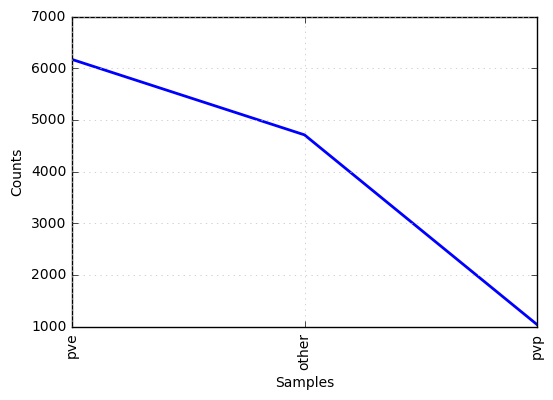

None
Death Knight
  pve other   pvp 
17275 14226  2685 
None


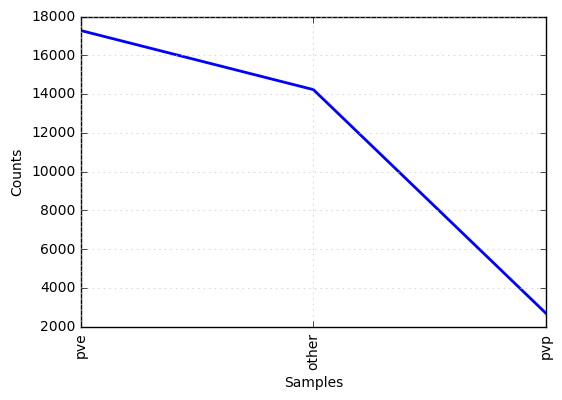

None


In [7]:
# plot histogram of findings
for wow_class in posts_with_game_type_dict:
    post_game_type_distribution = [post[4] for post in posts_with_game_type_dict.get(wow_class)]
    fdistGameType = nltk.FreqDist(post_game_type_distribution)
    print(wow_class)
    pprint(fdistGameType.tabulate())
    pprint(fdistGameType.plot())

In [8]:
# Print structure:
pprint('Dict level 1: ' + str(posts_by_class_gametype_author.keys()))
pprint('Dict level 2: ' + str(posts_by_class_gametype_author['Death Knight'].keys()))
pprint('Dict level 3: ' + str(list(posts_by_class_gametype_author['Death Knight']['pvp'])[:5]) + ' ...')
pprint('Dict level 4: ' + str(posts_by_class_gametype_author['Death Knight']['pvp']['Symmetry']))

"Dict level 1: dict_keys(['Death Knight', 'Demon Hunter'])"
"Dict level 2: dict_keys(['pve', 'pvp', 'other'])"
"Dict level 3: ['Exerz', 'Kayte', 'Mahl', 'Anomalous', 'Tethir'] ..."
('Dict level 4: [([\'Pact.\', "Conversion is dog now since the healing from it '
 "has been nerfed and you can't double tap it anymore.Conversion for RBGs "
 'though.", \'But just not in Arena.\', "In a melee cleave season conversion '
 'doesn\'t do jack.", \'It was good against lock teams last season - and '
 "almost every team had a Lock.'], '25/12/2014 02:56')]")


In [18]:
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
sid = SentimentIntensityAnalyzer()
# print(sid.polarity_scores('good bad ugly beautiful.'))
scores_by_class_gametype_author_post = {}
scores_by_class_gametype_author = {}
scores_by_class_gametype = {}
for wow_class in posts_by_class_gametype_author:
    scores_by_class_gametype_author_post[wow_class] = {}
    scores_by_class_gametype_author[wow_class] = {}
    scores_by_class_gametype[wow_class] = {}
    for gt in posts_by_class_gametype_author[wow_class]:
        scores_by_class_gametype_author_post[wow_class][gt] = {}
        scores_by_class_gametype_author[wow_class][gt] = []
        print(wow_class + ' ' + gt + ': ' + str(len(posts_by_class_gametype_author[wow_class][gt])))
        i = 0
        for author in posts_by_class_gametype_author[wow_class][gt]:
            scores_by_class_gametype_author_post[wow_class][gt][author] = []
            i += 1
            if i % 250 == 0:
                print(">>>\n>>>Progress: " + str(i) + '/'
                      + str(len(posts_by_class_gametype_author[wow_class][gt])))
            for post in posts_by_class_gametype_author[wow_class][gt][author][:2]:
                post_score = []
                for sent in post[0]:
                    post_score.append(sid.polarity_scores(sent)['compound'])
                #print(post_score)
                post_score_array = numpy.array(post_score)
                sc = numpy.mean(post_score_array)
                if sc > 0.5 or sc < -0.5:
                    # print(sc)
                    scores_by_class_gametype_author_post[wow_class][gt][author].append([post[0], sc])
            author_score_array = numpy.array([au_sc[1] for au_sc 
                                             in scores_by_class_gametype_author_post[wow_class][gt][author]])
            auth_sc = numpy.mean(author_score_array)
            if not math.isnan(auth_sc):
                scores_by_class_gametype_author[wow_class][gt].append((author, auth_sc))
                print(author + ': ' + str(auth_sc))
        gt_score_array = numpy.\
            array([au_sc[1] for au_sc in scores_by_class_gametype_author[wow_class][gt]])
        gt_score = numpy.mean(gt_score_array)
        if not math.isnan(gt_score):
            scores_by_class_gametype[wow_class][gt] = gt_score
            print('***\n** ' + wow_class + ' ' + gt + ': ' + str(gt_score))

print('DONE!!!')

Death Knight pve: 4366
Exerz: -0.8312
Carminax: 0.9485
Sylmarien: 0.50255
Zølack: 0.64715
Oh: 0.514325
Melvinftw: 0.6369
Xethys: 0.8126


D:\Soft\python351\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\Soft\python351\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Haros: 0.9285
Shagnasty: -0.64595
Marwix: -0.9359
Larixana: -0.5574
Revorgus: 0.50485
Baji: -0.6387
Sephrael: 0.63995
Aibiz: -0.59405
Faxes: 0.63035
Mothsphere: 0.7628
Thestor: 0.77945
Kalgash: 0.7131
Icetalon: -0.5106
Gideach: 0.5983
Verror: -0.510066666667
Pakslaag: 0.629633333333


Evìlyn: 0.7251
Worldpeace: 0.67565
Rottencherry: -0.52825
Rozpierducha: 0.53005
Elfelavaisel: 0.6584
Omnima: 0.7044
Dagleish: 0.9874
Nofi: 0.6901
Cheatéd: 0.557466666667
Neckbone: 0.916
Keanax: 0.857
Aljaska: 0.9661
Rôckstar: -0.6908
Zephius: -0.8133


Xersia: -0.032075
Tsujiro: 0.8409
Morrigän: 0.5302
Wychwård: -0.5578
Umbrakhor: -0.7134
Авел: 0.5266
Morgrann: -0.7184
Lightzum: 0.5267
Worlvius: -0.57395
Necrozis: 0.6177


Hardwire: -0.743
Manicure: -0.66805
Xyko: -0.658566666667
Blacklily: -0.8481
Terroto: -0.8348
Helkedir: 0.9756
Grezknight: -0.9426
Thetracer: 0.9062
Brozone: 0.9712


Iíìl: 0.5532
Kaíne: -0.9136
Sinvicta: -0.6369
Melendir: -0.05645
Obake: 0.04008
Sakon: -0.6554
Leothyr: 0.51405
>>>
>>>Progress: 250/4366
Shinybaron: 0.874


Musti: 0.8176
Narali: 0.7227
Broloff: -0.9355
Elevenhunter: -0.51546
Beneteau: -0.5859
Chrissucks: 0.7461
Víncent: 0.8867
Fragshunter: -0.8625
Tenzarin: 0.5106
Aracnophobia: -0.0193
Makron: -0.9001
Tozhiro: 0.67905
Drought: 0.9445
Raskunda: -0.645633333333


Yama: 0.7979
Forxina: 0.5574
Semirha: 0.6433
Daylgiht: 0.5942
Kadjitsu: -0.5423
Mâgisch: 0.5542
Rordor: 0.518
Ðeadelf: 0.86985
Darkanthem: -0.9398
Plaguemane: 0.73425
Misscelirith: 0.891
Thórken: 0.5871
Raz: 0.561966666667


Hoshino: 0.7034
Gallantmon: -0.7944
Caitie: -0.695
Nimzana: 0.1852
Chandelle: 0.7479
Tlite: 0.5574
Zeekor: -0.70265
Anklebiterr: 0.9136
Zyglrox: 0.580033333333
Muimoridin: -0.8834
Nocturnil: 0.7184


Icandomagic: 0.7469
Hordrim: 0.52565
Nazragel: 0.5423
Xuen: 0.639933333333
Raykim: 0.7717
Breakingßad: -0.9584
Avulsia: -0.5448
Drundeath: 0.6249
Thalandrel: 0.6249
Shadoweye: -0.6652
Dizlen: 0.6705
Yobe: 0.8271


Kùth: 0.7184
Jenika: 0.8286
Relios: -0.56485
Destroyer: 0.792666666667
Waffy: 0.6369
Vincénth: 0.6114
Einherjar: -0.6597
Gromga: 0.72185
Nysche: 0.6208


Lfr: 0.8594
Awsa: 0.563814285714
Neelkanth: 0.526
Xweiia: 0.802
Nyxh: -0.8238
>>>
>>>Progress: 500/4366
Yafellron: 0.57354
Lacandon: 0.6597
Ragæ: 0.6727
Yafellorn: 0.9488


Lifemagic: 0.7964
Laozhai: 0.5574
Jericho: 0.0128
Vulgrath: 0.66274
Hazuron: -0.7037
Skullblast: 0.88155
Tinerius: 0.5674
Tinypanzer: 0.783
Throdir: 0.7244
Jkes: 0.6249
Clontarf: -0.717975
Ancientfrost: 0.8573
Злойдикей: -0.9052
Pixxels: 0.526583333333


Fnx: -0.8591
Krizzdarkzor: -0.7999
Judgepsycho: 0.876
Xyon: 0.9304
Rokanz: -0.6936
Icyblade: 0.6369
Laylaril: 0.62045
Isabél: 0.6908
Skaadra: 0.9517
Nedhealr: 0.6705
Hárgor: 0.6155
Xylho: 0.64615
Enthyy: -0.50935
Tsaritsin: 0.6908
Gezrug: 0.7939
Zeusaijin: 0.6946
Roxaar: 0.8088


Deathfortold: -0.7319
Reliandra: 0.6696
Trinitÿ: 0.7717
Soméoné: 0.6369
Nadreal: 0.9118


Desolve: -0.9493
Xeoss: 0.846
Öenomaus: 0.8591
Kenshyrø: 0.70095
Neytira: -0.5256
Frostynar: 0.8126
Stocken: 0.5499
Cellice: -0.8838
Symbolistic: 0.53865
Basementkat: 0.6018
Abôlisher: -0.5383
Medínah: 0.86595


Rencarex: -0.75425
Stickx: -0.5256
Mundus: -0.60485
Arinyaa: 0.6369
Beann: -0.5017
Sukebe: 0.6204
Airell: 0.76815
Loonsta: -0.8307
Hopesedge: -0.5528
Ulaër: 0.7104
Brainlezz: 0.5952


>>>
>>>Progress: 750/4366
Wxms: 0.534633333333
Cyriël: 0.7003
Sheltzy: 0.9661
Necrotiqx: -0.503066666667
Lurkenhej: 0.5304
Schmilblik: -0.02825


Cìffíx: 0.6901
Ádmíral: 0.592466666667
Necyia: -0.7177
Veritor: 0.7436
Thisqt: -0.5106
Realdurrty: 0.714
Nägash: -0.7506
Zodd: 0.5927
Unholix: -0.6068
Orochîmaru: 0.531433333333


Omgkd: -0.561542857143
Shiftrune: 0.525683333333
Skorn: 0.5423
Araghon: 0.9674
Raidou: 0.6993
Evsknight: 0.8073
Cératus: 0.8268
Zzjo: 0.8074
Dknynot: 0.7469
Stillrotting: 0.6963
Ceridwynne: 0.6908
Warcon: 0.8679


Dracthar: 0.808
Accenato: 0.02685
Cadea: 0.6249
Sherise: 0.5719
Mustis: -0.5279
Fennix: 0.9231
Lunatic: 0.9719
Zalamar: 0.7964


Ajjhala: 0.5824
Ancìlla: 0.59715
Asmodaii: -0.9084
Crushallvein: 0.7077
Relictus: 0.631
Smidz: -0.6983
Uruwashii: 0.9403
Corbak: -0.5103
Rithiel: 0.0229
Betabarry: 0.6696
Kung: 0.8504


Ilyrian: 0.8228
Sephirìa: 0.53145
Gamlesverker: 0.6537
Pestbuster: -0.743
Thymalean: -0.8658
Zoldrage: -0.726625
>>>
>>>Progress: 1000/4366
Noden: -0.8365
Vylenia: 0.7959


Garimto: 0.596466666667
Bryantko: -0.0267
Fortvila: 0.5709
Infect: 0.6705
Wolfskinner: -0.7774
Gødlikez: 0.5017
Adam: 0.5387
Énnasus: -0.6486
Livepoopoo: 0.6369


Déstróyer: -0.5272
Avenjielde: 0.6597
Rained: 0.625033333333
Galagor: -0.7999
Icefever: -0.9274


Helqq: 0.5994
Frostfoxi: 0.5417
Raeda: 0.6915
Aélyra: 0.52235
Noveralia: -0.7524
Carant: -0.7291
Antidepresiv: 0.7876
Cyrisela: 0.6124
Deepmoon: -0.55405
Hyaki: 0.64445
Larthur: -0.6025
Sstopme: 0.6259


Arlaen: 0.5661
Ikerion: 0.567375
Futuristic: 0.5955
Azgodan: 0.7615
Soulcalíbur: -0.1393
Madvis: -0.7911
Steelshade: 0.9595


Sefriol: 0.5095
Athrod: 0.5859
Mione: -0.5423
Gueh: 0.773766666667
Karzgrath: 0.55545
Nudler: -0.6808
Dreadhôôf: 0.8508
Alesxandra: 0.803
Vansy: 0.6109
Ghoullove: 0.8126
Pim: 0.5859
Arsonn: -0.7579
Frostholic: 0.8264
Snør: 0.7668


Alleriä: 0.8779
Korktre: -0.9732
Kubarian: -0.8635
Nickolps: -0.9716
>>>
>>>Progress: 1250/4366
Cohèn: 0.73855
Khazir: 0.6249
Hunteroulaki: 0.6105
Dkpk: 0.6369
Sandalf: -0.6457
Tenebrìum: -0.8967


Kiite: -0.8779
Sinthya: 0.7269
Xernath: -0.68425
Mordreth: 0.6539
Zwart: -0.969
Putsvinje: 0.62675
Sàtyr: -0.66515
Whiteline: -0.5413
Endyn: -0.577866666667
Kermytina: -0.5423
Kulîmu: 0.6369
Sugartastic: -0.5994
Vaderia: -0.6597
Halonox: 0.7456


Shodowfang: 0.6369
Karabor: 0.8977
Puntz: 0.5315
Tarana: -0.8934
Tarsilin: -0.0196
Mólina: -0.7717
Darkrage: 0.5423
Madflipz: 0.53265
Nebhaal: 0.70145
Mohrn: -0.6749
Namae: 0.7161
Thisfacker: 0.11145
Emuhack: 0.6705
Enosya: 0.6265


Drayser: 0.7319
Dxilence: 0.53045
Theophilus: 0.6064
Pifflord: 0.5267
Emizel: -0.0816
Dreadeyes: -0.57285
Telkas: 0.51385
Shadowmourne: -0.00155
Vaeyn: -0.50684
Sóxx: 0.6052
Mixtli: 0.5574
Koeienvanger: -0.66125
Karkantas: -0.8715


Léddi: 0.76915
Avixhawkk: 0.528366666667
Thános: 0.52885
Ритуал: -0.9659
Vinnicus: 0.8452
Cuoco: 0.644075
Caplin: 0.8089
Rhawen: 0.76715
Firyal: 0.6908
Dkdonkey: -0.7735
Kopke: -0.76635
Indicaqt: 0.6448
Júdgey: 0.765


Jessicajones: 0.130633333333
Avelie: -0.5102
>>>
>>>Progress: 1500/4366
Lorax: 0.542927777778
Nímzana: 0.6901
Strife: 0.55735
Stinkysocks: 0.5773
Callmezli: -0.8537
Sinndragossa: 0.7193
Zilpui: -0.5578
Filnaen: 0.7096
Xarok: 0.8264


Zolgi: 0.5608
Vengerous: 0.6249
Armágeddön: 0.68245
Decrementix: -0.619842857143
Moxjet: 0.64285
Necria: 0.74415
Viki: 0.5199
Sazir: 0.6229
Kaiko: 0.7685
Necrophat: 0.8029
Ðevastate: 0.6124
Isuril: 0.9253


Silaedru: 0.58985
Enderer: 0.733633333333
Doomstone: 0.71405
Sparg: 0.6648
Vholchick: -0.6369
Blightbeard: 0.6276
Duskspell: 0.74285
Kharthal: -0.7314
Littlekunt: -0.5267
Chilicharlie: 0.6411


Rixxen: 0.55165
Grimgor: 0.82605
Skampie: 0.7951
Trikola: -0.638233333333
Cryptelon: -0.700733333333
Lothyhar: 0.9274
Murgthar: -0.544633333333
Spìne: 0.5859
Omgapaladin: 0.7491
Seaal: 0.71055
Baoao: 0.7717
Kvasir: -0.7845
Heruini: 0.7425
Endemic: 0.6369


Batspine: 0.7964
Sczezly: 0.6877
Ondmann: 0.7717
Hellgrave: 0.0912
Sonarok: -0.72762
Kortaz: -0.89335
Nocturnäs: -0.6113
Showc: 0.7253
Psiharq: -0.743
Valarjar: 0.6898
Gyrm: 0.56045
Mortacai: -0.953
Predlùlz: 0.5574
Grymvild: -0.502382608696


Архисоло: -0.73605
Darkhyper: -0.8795
Virulent: 0.8434
Hiigh: 0.8835
Return: -0.596425
Norlegende: 0.6114
Gutan: 0.9464
Conors: 0.6417
>>>
>>>Progress: 1750/4366
Alleine: -0.5143
Karnage: 0.8468
Filoviridae: -0.8492
Alnya: 0.5719
Torakin: 0.7264


Sinister: 0.538066666667
Tuledk: 0.7269
Stranger: -0.658383333333
Tive: -0.5533
Bastiôn: 0.8776
Tarskal: 0.8807
Jhinjíe: -0.68685
Kronik: -0.53445
Jimjam: -0.5868
Big: 0.6597
Ayaney: 0.5635
Reotheras: 0.6249
Nappyrash: 0.6249
Gokuson: 0.6124
Sadblade: -0.5267
Darth: 0.609133333333


Arotha: 0.6116
Grímjaw: 0.509733333333
Tribaleyes: -0.68775
Buldrek: 0.8225
Crágoth: -0.6428
Heallarious: 0.8386
Tipee: 0.639894444444
Drekthull: -0.6664


Mifra: 0.9001
Cirkus: 0.5033
Vathos: -0.631
Tyrusaran: -0.6207
Ottila: -0.5267
Lumpenlarry: 0.5574
Eluneela: 0.7351
Catstrangler: -0.885


Kalcron: -0.513166666667
Thaldes: 0.9265
Túrwaithon: -0.5994
Valiera: 0.574433333333
Asukà: -0.7579
Qari: 0.6369
Gamir: 0.64765
Tukam: -0.507
Ayshas: 0.502783333333


Çróòw: 0.9666
Nÿv: 0.546066666667
Sonofálich: -0.8316


Elondrë: 0.5667
Tonolo: 0.7414
Johnnybgoode: 0.75695
Lichepriest: 0.7783
Buvarette: 0.6801
Basiun: -0.7862
Paramet: 0.547933333333
>>>
>>>Progress: 2000/4366
Bamischijf: 0.5106
Hogglebog: 0.784


Atermon: -0.696
Azreth: 0.8176
Malícé: 0.6908
Jerollo: -0.7851
ßigdikhorror: 0.89905
Thyranos: 0.554
Céldora: 0.9473
Zevasra: -0.63495
Dk: 0.54536
Byenkow: 0.66845


Icaroz: 0.6761
Machaera: 0.6743


Haemund: 0.1142
Asag: 0.50605
Xulrogg: 0.62675
Blite: 0.639933333333
Takralus: 0.5852
Lemiqt: 0.1285
Moudi: -0.887
Nightskye: 0.72825
Nurglle: 0.9426
Necrotíq: -0.7263
Omkommen: 0.9155
Rokuma: -0.836
Trekhan: 0.7149
Syldrea: -0.8232


Sael: -0.8777
Tasz: 0.81835
Caskirensys: 0.74085
Lashin: 0.7175
Combo: 0.7329
Azihant: 0.6115
Neteari: 0.8745
Doijh: 0.8126
Grotargh: 0.5859
Norwyn: -0.5224
Mokkoo: -0.5889
Belszazar: 0.57195
Negru: 0.8303


Ahneasten: -0.7113
Hase: 0.7269
Dreshar: 0.6444
Tehreaper: 0.5481
Rihannah: 0.61468
Magharlogosh: 0.7118
Werebeazt: -0.5672


Benicetome: -0.9312
Flúmmer: 0.7242
Descend: 0.7865
Ruairí: 0.5994
Kezest: -0.6304
Baiter: 0.712175
Yurmama: 0.509883333333
Hemsläp: 0.56955
Elivagar: -0.649
Decite: -0.59285


Arthaniun: -0.0554125
Ciene: -0.543266666667
Chillinthano: 0.8399
>>>
>>>Progress: 2250/4366
Wraith: 0.7034


Roxcy: 0.8591
Melviin: 0.5363
Vecis: -0.697
Resahsan: -0.8919
Britomartis: 0.9678
Sónofalich: -0.53
Recinius: 0.6239
Taurus: 0.5729
Nëmain: 0.7707
Seraphel: 0.508
Kraugerys: -0.65015
Вирейм: 0.557033333333


Sherawr: 0.8126


Crosbie: 0.5354
Azazeél: 0.69135
Barke: 0.5588
Razalghoul: 0.735375
Néwt: -0.7075
Outworld: -0.6486
Feïla: 0.5023
Deathgranter: 0.9186
Okog: -0.9769
Nordrak: 0.74345
Bombata: 0.6114
Massicor: 0.203
Damnmate: 0.5999
Nekromanis: 0.6705
Melkorii: 0.9769
Apøtika: 0.743


Monobrow: -0.58685
Cathelion: 0.74255
Goresin: 0.5429
Wayneth: 0.9201


Cozbarian: -0.7705
Despina: 0.0363
Smolley: 0.5719
Refrigeratio: 0.8196
Jacqaues: -0.5583
Darklion: -0.7876
Aalesìa: 0.535936363636
Koradan: -0.7218
Zundap: 0.62235
Nurfed: 0.5835875
Bromama: -0.9042
Stabil: 0.5093
Rachika: 0.8038


Candyman: -0.8677
Shuanyu: 0.7671
Tidorro: 0.77915
Wajoba: -0.6293
Màhmoud: -0.56175
Scárecrów: 0.66285
Zombae: -0.7964
Tenebraeus: -0.8922
Brayden: 0.7717
Øldschòólbrø: 0.6705
Insy: -0.51495
Bugknight: -0.9348
Rayken: 0.555033333333
>>>
>>>Progress: 2500/4366


Protectio: 0.8278
Raynbeaux: 0.8195
Grafschennis: 0.088
Bumpy: 0.5994
Teddybéar: 0.5093
Wrathbourne: -0.5180375
Beardmire: -0.623133333333
Daquandrix: 0.7343
Ampère: 0.5158
Khabib: 0.73765


Anoriann: 0.9709
Vejeta: 0.748566666667
Peters: 0.9308
Enlevendk: 0.8088
Iguana: 0.7311
Grubass: 0.65005
Sindrelia: 0.6369
Serikos: -0.6114
Mjõlnir: 0.5859
Snutch: -0.6482


Papshmir: 0.6369
Korsbaek: 0.7351
Kratós: 0.8943
Pùnishér: 0.891
Dremorá: 0.9297
Huggstah: 0.6705
Aztheoden: -0.926
Gormmash: 0.71175
Tyrant: 0.5719
Logard: 0.765
Ordinator: -0.7698
Luná: 0.59795
Dheta: 0.542666666667
Kunxion: 0.7424


Screampunk: -0.8817
Willempie: 0.7778
Kronuk: -0.5104
Rivendane: -0.7043
Psymix: -0.6124
Asheena: 0.7003
Soulain: 0.625
Malcator: 0.6597
Shaolinjoey: 0.9464
Triø: -0.64705
Lethyss: 0.521733333333


Kishaar: 0.719075
Infected: 0.6249
Survie: -0.7627
Elogyl: 0.9179
Evilgoose: 0.578133333333
Vahx: 0.6369
Lupcold: 0.6239
Fleetwoodmac: 0.6908
Prédation: 0.9201
Floinky: -0.6125
Hagbean: 0.8555
Plzyes: 0.57835
Melretheas: -0.7584
Schöne: -0.8322
Griev: 0.9006


Galbana: -0.67025
Truelies: 0.7086
Azaléa: 0.6309
Bénafflóck: -0.7604
Quinshar: 0.5994


Bulawl: 0.9575
>>>
>>>Progress: 2750/4366
Zock: -0.6183
Wall: -0.6124
Aemithil: 0.8126
Vibron: -0.7998
Scylla: 0.8052
Komenasai: 0.6808
Tariro: 0.63555


Redigit: 0.5423
Blazeit: 0.8442
Mixzi: 0.9201
Trampjuice: 0.9465
Zeyon: -0.698
Arhaindir: 0.8554
Starftlord: 0.7219
Soulcleaver: -0.6745
Flukey: -0.5452
Ëlsa: -0.7345
Karashka: -0.786
Maggotsnout: 0.7574
Unholyhaze: 0.540666666667
Maladi: -0.5423
Rathior: 0.578675
Amexi: -0.9504


Sakkii: 0.8995
Killyox: 0.8126
Stévè: -0.602775
Horribleclas: 0.5473
Asmodaï: -0.5267
Altiria: -0.57285
Corvinous: 0.9001
Hokusai: 0.8779
Delmare: -0.765
Jaikouh: 0.5178
Frontlinert: 0.6274
Veng: 0.53265


Spmcy: -0.6342
Crouchgoth: 0.9165
Yknuf: 0.6369
Förbannad: 0.5023
Shailen: -0.7351
Castiel: 0.5465


Slagerno: 0.9483
Sepheris: -0.01025
Metallus: 0.9341
Thisnthat: 0.0122
Pestilence: -0.57875
Rêapêr: 0.765
Irisviel: -0.96495
Stray: -0.559775
Mahia: 0.6486
Lianew: 0.5859
Draenoris: 0.8658
Sneakýsquid: -0.6597
Zurduk: 0.61805
Eniqma: 0.6854
Illidanas: -0.596466666667
Cryogenian: -0.5719


Frknye: 0.595
Raakh: -0.58155
Zénzár: -0.20805
Selaris: -0.8399
Suffocate: 0.5803
Daevva: -0.5288
Barashade: -0.663775
Rumtum: -0.7964
Feárless: 0.6732
Viluhe: 0.021225
Schevendalk: -0.611
Sacredsinful: 0.8519
Mitts: 0.7759
Saqib: 0.7118
>>>
>>>Progress: 3000/4366
Phathazé: -0.5423
Panicrockz: 0.5267


Ciel: -0.7984
Grayfóx: 0.7177
Keilen: 0.5267125
Sacra: 0.7003
Shesha: -0.8717
Acephali: -0.6118
Qiralyn: 0.9549
Siffrah: 0.524183333333
Exoda: 0.054525
Dïablô: 0.6369
Galgarion: 0.87515
Arctice: 0.5859
Jeina: 0.8596
Vert: 0.5859
Flobzy: 0.6157
Hyneken: -0.7258
Kassina: 0.8104
Tabori: 0.62795
Shoov: 0.51695
Dkjin: 0.8162
Palemaster: 0.659


Discworld: 0.895
Andreasffs: -0.5351
Derza: 0.9785
Banê: 0.9267
Hugedeal: 0.9352
Rashgarroth: 0.6735
Cheesits: -0.7964
Acaélz: 0.872
Overtime: -0.8079
Purifier: 0.7906
Nocylah: 0.908
Asunje: 0.6114
Finaso: -0.55545


Mogatroll: 0.9413
Bthem: 0.8377
Watchmetrap: 0.6875
Thwarin: -0.9393
Färdigheten: 0.8087
Macleodros: 0.7783
Gteezie: 0.8358
Schizoid: -0.5213
Akì: 0.60895
Exoozen: -0.00435
Zonthuur: -0.5994
Abominabilis: -0.5719
Bigiel: 0.7132
Azeron: -0.1316
Sighuman: 0.69


Bootyjuice: -0.8074
Kaizo: 0.612585714286
Obelisk: -0.8316
Anomalouß: 0.9332
Shingekí: 0.9417
Myté: -0.52515
Dhallia: -0.8964
Vesuvius: -0.5265
Mabb: -0.7766
Forbiidden: 0.6498
Navhkrin: 0.5528
Heleva: 0.5658
Ariakan: 0.8813
Lockaflocka: -0.5719


Griff: -0.891
Murgash: -0.6249
Taurlordz: 0.68185
Wellmetxd: 0.7579
Drartul: 0.5719
Kashendra: -0.9849
Izilla: -0.61815
Richietugnut: -0.5992
Jenifurpls: 0.6833
>>>
>>>Progress: 3250/4366
Zaghon: 0.738
Vailanis: 0.54785
Wraithinia: -0.7519
Zregski: 0.8748
Nervóus: -0.7246


Teebufall: -0.765
Querion: 0.6725375
Greave: 0.8834
Eathelin: -0.9022
Deadduchess: -0.9477
Naynay: -0.695
Kteh: 0.6875
Ódessit: 0.6488
Renekke: 0.8625
Sleeprest: 0.7964


Raarrgh: 0.56915
Elenwyn: -0.8428
Koudbeap: 0.8207
Delhrak: 0.6908
Iliar: 0.9029
Udargjin: -0.537175
Savebilly: -0.5546
Èvelìn: 0.6369
Grimdaal: 0.563125
Aquilion: -0.5423
Slutknight: 0.8904
Felnore: 0.5106


Sancta: 0.575
Azinò: 0.7198
Kreeve: -0.7717
Dave: 0.9826
Ileet: -0.04045
Xénu: 0.8832
Kainston: -0.8533
Djtrashcan: -0.807


Sordurar: -0.8759
Obliterater: 0.63
Ggnore: -0.5423
Succumb: 0.5075
Shaguar: 0.6808
Epicfailugy: -0.7582
Brummbär: 0.7263
Necrofest: -0.6526
Wussie: 0.56975
Kealtair: 0.7717
Vläd: -0.9321


Anubís: 0.9042
Korkesh: -0.7363
Calacus: -0.5423
Infectsalot: 0.653066666667
Xstasheep: 0.51405
Thanitos: 0.5572
Punger: 0.6678
Reddocc: 0.66975
Mollismeni: -0.612
Deathwhisper: 0.5106


Agimeres: 0.5894
Velnira: 0.613966666667
Chillbane: 0.612466666667
Kámu: 0.8173
Aelthanas: -0.6998
>>>
>>>Progress: 3500/4366
Rutic: 0.572233333333
Tála: 0.8201
Shinigamí: 0.8765
Áléría: -0.656


Runefaust: 0.72455
Harricke: 0.5994
Abrakkar: -0.9547
Takeyourtime: 0.7723
Vytari: 0.8008
Therinea: 0.5238
Neiel: 0.722
Shéele: 0.6808
Grimfeld: 0.50885
Heísenberg: 0.8116
Tokado: 0.634225
Kelan: 0.9387
Korvate: 0.5653
Stórmez: 0.5719
Iwillreku: 0.7066
Blóódspiller: -0.02685
Vredd: -0.5423
Blice: -0.5776


Smokeyegg: -0.9586
Semikätyri: 0.5764
Moxemerald: 0.7184
Video: 0.6574
Xhaco: 0.79785
Gram: 0.52645
Stallios: 0.04765
Treufus: 0.765
Nour: 0.5423
Victor: 0.5376
Akuyama: 0.5294
Chillingear: 0.6997
Cantkillme: 0.581333333333
Sinio: 0.5642


Aelarath: 0.55535
Edstur: 0.7717
Rajini: -0.796
Frostember: -0.6597
Terankar: 0.714
Corvina: 0.7089
Yelldar: 0.5574
Quach: -0.560475
Ballabird: 0.93815
Loanel: -0.8636
Sapience: 0.61406
Guldfesk: -0.9349


Deathborne: -0.791966666667
Zljo: -0.9555
Thörin: -0.7964
Moarrunes: 0.7495
Malvious: 0.6138
Amazín: -0.602455555556
Sherkhan: 0.544333333333
Ciyn: 0.8986
Hazalan: 0.6249
Xarlanthar: 0.61905
Gráves: 0.644725
Jääpaketti: 0.678366666667
Kakzak: 0.7783


Koraboros: -0.9104
Krahai: 0.6047
Ragaash: -0.8222
Noggí: 0.6663
Khagalat: -0.8439
Navhkrinn: 0.8074
Scøurge: 0.5719
Aethyioa: 0.9216
Gekkonn: 0.79865
Tuubal: 0.518066666667
Hatedemon: 0.6597


Tyraxes: 0.58925
>>>
>>>Progress: 3750/4366
Draganarius: 0.582633333333
Lancette: 0.5267
Agéntsmith: 0.9251
Àrthäs: -0.5267
Uzziro: -0.5975
Megazia: 0.5859


Tausaurus: 0.5719
Noomers: 0.6548
Darkdlver: 0.7434
Malgur: 0.87285
Arathon: -0.836
Gado: 0.5106
Phalandor: 0.59725
Nakaburok: 0.7335
Profox: -0.69545
Vardun: 0.9346
Nareida: -0.0928


Minxy: 0.9762
Brunsausen: -0.59465
Kvitrafn: 0.8856
Rwqrqw: -0.6705
Evelîn: -0.67605
Taurenkrizz: 0.9782
Groktah: 0.5994


Todoran: 0.7391
Levril: -0.743
Valdred: -0.608366666667
Rúnarc: 0.836
Gorethaz: 0.75875
Hegzer: -0.6037
Moserah: 0.6329
Êldritch: 0.70935
Deadbreed: 0.6576375
Aeslin: 0.78675
Eaffair: -0.571266666667


Frozenfruit: 0.9506
Aphrodìté: -0.94315
Kuntzee: 0.6908
Nirvia: 0.6361
Wildlive: 0.5571
Thebecchino: 0.9664
Sunuwar: -0.559766666667
Venteta: 0.9262
Zmaychek: 0.52885
Saivara: 0.8468
Frozenknight: -0.52245
Beyondts: 0.8458
Deeble: 0.64925
Deathfist: 0.7341
Kayte: -0.9227


Mightywombat: 0.8169
Orcporks: 0.83785
Frostman: 0.8137
Inuba: 0.04329
Molaag: -0.5574
Apheon: 0.63645
>>>
>>>Progress: 4000/4366
Umadbrah: 0.5106
Keeill: 0.7722
Dextor: 0.752816666667
Harriett: 0.5023
Antenora: -0.8934
Nathrizarri: 0.7227
Lastsentinel: -0.6769
Wormlord: 0.9011
Wennix: 0.62595
Frostsworn: -0.1588


Clowncrusty: -0.8869
Grxkas: 0.5077
Homeboypeter: -0.765
Rinnve: -0.74595
Nineties: 0.63705
Elsliverleaf: 0.744
Dethlok: 0.6145
Tírión: 0.7971
Arcten: -0.89
Kuroyaksha: 0.6705
Maldrum: -0.59235
Pookee: 0.571


Abacinate: 0.858
Opusmek: 0.70295
Respire: 0.7674
Alcho: 0.8765
Sindaheal: 0.9001
Vm: 0.677
Spunkmeyer: 0.55805
Tiriha: 0.8504
Lakutus: 0.62755625
Sikoly: -0.7964
Linkedblood: 0.6367
Larts: -0.128975


Djdeathspank: 0.7952
Darthwind: 0.6486
Nekrah: 0.5255
Rayland: -0.705
Drayiicha: 0.567225
Zandall: 0.61985
Zenaphin: -0.6037
Necronx: -0.685475
Lawc: -0.9275
Faralet: -0.5508
Vanaxarion: -0.8302
Pietri: 0.6696
Ishwish: -0.9468
Gemmaker: 0.5629
Selandra: -0.7906
Rixis: 0.8225
Nasranejdk: 0.11115
Snayk: -0.506


Swagzílla: 0.5147
Zmaychex: 0.87145
Bodom: -0.5291
Sungraze: 0.6654
Bleakiss: 0.6597
Barock: 0.8253
Pythaganos: 0.674
Winterpwnd: -0.5196
Bonershield: 0.6486
Mijaki: 0.6332
Punany: 0.772166666667
Valkryss: 0.7717
Zyrtx: 0.66825


Ragganese: 0.8573
Nardeth: 0.569666666667
Morgooth: -0.6818
Darkmite: -0.8913
Гаррил: -0.5542
Caedmos: 0.6597
Zilent: 0.84545
Axelstorm: -0.60605
Doge: 0.59235
Dekata: 0.6239
Tofu: -0.615933333333
Regergek: 0.7269
>>>
>>>Progress: 4250/4366


Ashenbreath: -0.097625
Rapidor: 0.5661
Hawkthorne: 0.6315
Exyth: 0.7684
Ðaniel: -0.578533333333
Asedas: 0.51225
Kaftoy: 0.6811
Jadiss: -0.6486
Gorehog: 0.9051
Warfiend: 0.7579
Krónog: -0.6249
Midgetmagic: -0.8437


Hraga: 0.5949
Omar: -0.7184
Edotensei: 0.8905
Mortarrion: 0.518166666667
Seung: -0.7234
Silversword: -0.5772
Massmurderer: 0.8567
Chogar: -0.516066666667
Antiface: 0.8176
Cathwoman: 0.6647
Jawzy: 0.9338


Nabu: -0.6705
Kvitrafnx: -0.978
Tanyria: 0.6927
Lucà: -0.818233333333
***
** Death Knight pve: 0.234111721682
Death Knight pvp: 1129
Anomalous: -0.7964
Ebonmar: 0.1364125
Murm: 0.7096
Untaraél: 0.8479
Баграмян: 0.53102


Elpolakoo: 0.8381
Djenghis: 0.64265
Cyrisela: 0.6369
Vaeyn: 0.6002
Graufenstein: 0.0125
Dayyka: 0.7717
Larthur: 0.73
Bugknight: -0.8126
Måus: 0.6369
Epicly: 0.7042
Chrozor: 0.55655
Stranger: -0.51508
Raykim: -0.77
Grubfoot: -0.7825
Helwinter: 0.5766
Nekrah: 0.7269
Nís: 0.549575
Desecrated: 0.7154


Azinò: 0.775
Frostfoxi: -0.6325
Sinatos: -0.5171
Wormlord: 0.982
Finisher: 0.7506
Gasthejews: 0.6249
Rotflap: 0.73265
Tragga: 0.55
Seraphel: 0.765
Djtrashcan: -0.8796
Gravetouch: 0.05795
Kteh: -0.676466666667
Prosít: 0.69
Runárc: -0.5106


Fled: 0.9881
Crosbie: 0.9243
Worlvius: 0.8474
Hennyx: 0.5889
Néwt: -0.8972
ßùù: 0.9074


Klegane: 0.7096
Anaariel: 0.5374
Nickolps: -0.73395
Sollicitus: -0.6705
Slutknight: -0.8316
Hunteroulaki: 0.8378
Thetracer: -0.8957
Reddocc: -0.658775
Wòózgrim: 0.8444
Tattarpippi: 0.69995
Zoliaxen: 0.7378


Platefist: 0.5568
Julosch: 0.5423
Løre: -0.9796
Védma: -0.8872
>>>
>>>Progress: 250/1129
Chillingear: 0.81325
Dorethien: -0.8832
Jesi: -0.62765
Shinigamí: 0.64315
Pharaah: 0.8818
Sívér: -0.5859
Nazhgul: -0.7915
Raakkh: 0.6318
Ðarkingz: 0.5106
Aracnophobia: -0.64515


Bryanxoxo: 0.67155
Zombae: -0.5719
Kiiljah: 0.5723
Alkizon: 0.6858
Fistsoffury: -0.6782
Yama: -0.7397
Maxpimpin: 0.542975
Raakh: -0.6908
Denzay: 0.8225
Ambjörn: 0.5791
Dolyak: 0.802
Djkarverqtx: 0.5423
Dreadmight: 0.8011
Norsilian: 0.5938
Shadowmourne: 0.6124
Smittorisk: 0.81185
Kadjitsu: -0.6408
Gilletta: 0.8248
Бракус: 0.5445
Atermon: -0.0989


Delfen: -0.8329
Ageca: 0.57125
Natharya: -0.52065
ßelleclaire: -0.5693
Rooachîe: -0.5052
Terankar: 0.6486
Brida: 0.8118
Hasslehøøf: 0.867
Shadów: 0.8166


Faxes: 0.9402
Blastz: 0.63145
Family: -0.68075
Elvadia: 0.745475
Rhawen: 0.5026
Deathborne: -0.5423
Dkdonkey: 0.6865
Nèmo: 0.6361
Frodomir: 0.59235
Daevva: -0.7096
Ciyn: 0.11055
Huggstah: 0.9284
Strife: -0.5256
Waruk: 0.5106
Robóbro: -0.1989


Soulboundz: 0.51482
Filnaen: 0.9308
Misanthrope: 0.7538
Ricky: 0.5423
Esa: 0.5949
Zibor: 0.575733333333
Krónen: 0.5093
Darkdavidzee: 0.9136
Elvanos: -0.6284
>>>
>>>Progress: 500/1129
Rastadeath: 0.9389
Xekus: 0.67515
Iusedtochew: 0.6537


Drahkaro: 0.922
Chrosis: -0.603
Acelius: -0.8488
Crode: 0.5757
Akamel: -0.8936
Hollowed: -0.9837
Zoldrage: 0.9343
Dkjävel: -0.57525
Awwsorry: 0.68245
Ëvelìn: -0.0815625
Scourged: -0.5994
Kassina: 0.64995
Wraith: 0.7488
Hakuteiken: 0.61115
Instïnct: -0.8274
Pandora: 0.7233
Crønøs: -0.5994


Susannia: 0.7543
Pansarplåt: 0.72055
Richietugnut: 0.52895
Kogarasu: -0.6637
Vengerous: 0.959
Ancientfrost: 0.62255
Злойдикей: 0.6369
Kaylan: -0.7003


Tuulan: 0.6162
Strongjohn: 0.615266666667
Vibron: -0.6806
Zoúnkla: 0.9638
Sylverwen: -0.821
Tidorro: -0.6597
Mafaldekas: 0.569833333333
Bellamorte: 0.9134


Hehr: -0.5768
Necro: 0.714
Xiore: -0.5994
Valherü: -0.148925
Hristoslaptr: 0.6076
Jengul: 0.6592
Soméoné: 0.703


Kojhuiyte: -0.9783
Alatristë: 0.57675
Aphrodìté: 0.7906
Necrofenix: 0.7687
Sunuwar: 0.89775
Xdaddy: 0.7345
Zilpui: 0.7003
Gallagor: 0.61865
Slaggeh: -0.8866
Uland: 0.6856
Skido: -0.01655
Sàtánâs: 0.6369
Triø: -0.7063
Valsheres: -0.02465


Beaniel: 0.7998
Castiel: 0.037
Corgi: 0.8679
Seleniele: 0.8074
>>>
>>>Progress: 750/1129
Fuzzah: -0.70815
Kemii: -0.58345


Thisnthat: 0.8044
Mayuwen: -0.556075
Ulaër: 0.64985
Skillgrip: 0.6415
Verestrasz: 0.58935
Amigaria: -0.8289
Cryogenian: 0.8932
Sheltzy: -0.7449
Kuroyaksha: 0.6369
Groggrogge: -0.51565
Bryan: -0.7693


Rayken: -0.6322
Matta: -0.9614
Mâlguur: 0.6219
Allout: -0.687
Tyrusaran: 0.5994
Zensarok: 0.5255
Tragar: 0.7319
Larts: 0.5994


Thebasher: -0.5499
Drèco: 0.9667
Tiagon: 0.9465
Wxmz: -0.6054
Deinhardt: -0.872
Necronx: 0.5927
Punzibower: -0.8712
Vrek: 0.6061
Maggelan: -0.53765
Dknynot: -0.7783
Scoot: 0.5849
Ezekíel: 0.7929


Thargok: 0.9554
Downbreak: 0.6597
Accenato: -0.8322
Sonofálich: -0.9428
Ragganmore: 0.743
Prixterman: 0.6369
Hijackero: 0.7301
Aipetikos: 0.5423
Deestruction: 0.0459875
Nightsorrow: 0.641
Cripxoo: 0.8271
Rashgarroth: -0.7003


Seregorn: -0.5213
Phobrial: -0.6239
Basiun: -0.5106
Twann: 0.802
Vials: 0.57035
Icycola: -0.5739
Aristides: 0.50505
Uruwashii: -0.7677
Truèwarlock: 0.9244
Iss: 0.55545
Mísanthrope: -0.7148
Impêrius: 0.7003
Nimakkry: -0.09975
Javool: 0.5179
Hemski: 0.65055
Doge: -0.5719
Valravn: 0.6908
Fsdasdas: -0.9424
>>>
>>>Progress: 1000/1129
Bootyjuice: -0.667
Kyobo: 0.6973


Gauldur: 0.7221
Xcgffbg: 0.6808
Angelus: -0.5994
Deathknife: 0.9692
Soeki: 0.6396
Fragarch: 0.6124
Nÿv: 0.7783
Deadduchess: 0.5224
Geowarr: -0.7266
Aleal: -0.66535
Hordrim: 0.6118


Evelïn: 0.5571
Mjølnìr: -0.745633333333
Hraga: 0.7184
Avnar: 0.7351
Mâgisch: -0.5174
Valdri: 0.8176
Cengznucël: 0.533
Blinkfloyd: -0.8834
Keebi: 0.84195
Kurosu: 0.9018
Greavon: 0.6239
Bismark: 0.606733333333
Chryz: -0.8074
Nimzana: 0.9776


Vampigore: 0.9528
Nortos: -0.6249
Nojawjim: -0.5267
Omnima: -0.8236
Dips: 0.82155
***
** Death Knight pvp: 0.198701314681
Death Knight other: 4436
Velka: -0.7964
Kyverra: 0.9485
Азриил: -0.6533
Noden: 0.5267
Shaque: 0.7603
Despite: 0.53995
Humanracial: -0.7492
Dklara: 0.8519
Plaguespawn: 0.6569
Graufenstein: 0.9618
Inf: 0.68075
Letifa: 0.7906
Nudler: 0.8154
Samsing: -0.5447
Gideach: 0.5106
Aarounimus: 0.7333
Wowciaran: -0.5622
Anfáuglith: -0.8519
Vrek: 0.6627
Sixpackdrums: 0.5967
Cnedra: 0.71715
Rottencherry: 0.7269
Mokba: 0.76675
Niros: 0.5719
Ninetysevens: -0.5423


Dagleish: 0.8442
Biaen: -0.9325
Cheatéd: 0.7615
Foxyferret: 0.6705
Phäntömel: 0.8658
Teneth: 0.7003
Decapitation: -0.7906
Soulcalibur: 0.6166
Dìngo: -0.5563
Evilbimbo: 0.5284
Ashwillow: 0.56435
Gravetouch: -0.62045
Gallest: 0.5267
Rehabilitate: -0.8625
Rotheart: 0.6549
Dcmonroe: 0.9292
Wychwård: -0.60605
Pliffy: 0.6762
Vanro: 0.5994
Rylaicrystal: -0.8788
Lynari: 0.5213
Kedavra: -0.5267
Entaari: 0.741675
Xarroc: 0.6054
Tyendra: 0.6597
Cmere: 0.7003
Lashiel: 0.7125
Ríva: 0.5484
Màndy: 0.1051
Lizzykenzie: 0.7667
Agrozh: -0.5994
Rivornell: -0.8225
Obake: -0.8402
Jesi: 0.8519
>>>
>>>Progress: 250/4436
Fushi: 0.7034
Lemon: -0.57585
Musti: 0.7178
Baeurn: 0.5423
Besu: -0.7637
Hoschelhoff: 0.7783
Narali: 0.7506
Negru: 0.875
Avatär: 0.5367
Raakkh: 0.8175
Seretin: -0.7655
Kael: 0.5854
Rapidoro: 0.5848
Ikerius: 0.7603
Onlynxm: 0.66735
Djokema: 0.7506
Ciyn: -0.7003
Wornlord: 0.8442
Yama: 0.5277
Gaiusbaltars: 0.8591
Kentroze: 0.71255
Sheffy: 0.5719


Dreadmight: -0.8047
Gorgonis: 0.6581
Kadjitsu: -0.7643
Zeytoon: 0.7035
Rimehoof: 0.9081
Rordor: 0.6588
Sneakysweep: -0.5764
Xarlanthar: 0.955
Gallantmon: 0.9175
Durament: -0.6282
Nimzana: 0.8422
Mahl: -0.7506
Agrotera: -0.7878
Kátyperry: 0.6522
Ragnaz: 0.7096
Caédes: 0.7901
Muimoridin: -0.5122
Dadruy: -0.5719
Манхэттен: 0.7184
Vilwyn: -0.8225
Napua: 0.875
Ukuza: 0.8231
Snozï: 0.6369
Saynis: -0.143
Raykim: -0.6249
Avulsia: 0.8418
Bonishin: -0.7194
Callmezli: 0.7793
Ignite: 0.624
Хьяргрим: -0.7845
Thalandrel: 0.8225
Lollollól: 0.6486
Richter: 0.6705
Torren: 0.59325
Sanngriðr: -0.6486
Shadoweye: -0.7717
Pijanica: -0.73125
Asfdkljasd: 0.836
Goa: -0.8481
Freyleyes: 0.5859
Melblaze: 0.6597
Xhanath: 0.7632
Kalazam: 0.5267
Einherjar: -0.6597
Palpatina: 0.6705
Mawemu: -0.6249
Lfr: 0.6597
Kerenis: 0.7394
Mchammered: -0.5106
Matta: 0.7096
>>>
>>>Progress: 500/4436
Sedacra: 0.875
Creecher: -0.6808
Penetrallia: -0.5411
Scourged: 0.8402
Gommié: 0.6247
Greytech: -0.7133
Krónargh: 0.7637
Xerdan: 0.707

Hazuron: 0.8765
Daelroth: -0.5283
Alynea: 0.59735
Wildhaze: 0.6705
Ruda: 0.6187
Ancientfrost: 0.7003
Miezz: 0.6124
Barnakus: -0.5448
Verkas: 0.7923
Koltiran: 0.5994
Judgepsycho: 0.6044
Halbrecht: 0.7687
Wòózgrim: 0.64355
Carissime: -0.903
Icyblade: 0.7269
Laylaril: 0.61155
Skaadra: 0.5414
Necroaids: 0.5788
Impurex: 0.5719
Tailborn: 0.6705
Xylho: 0.6381
Myrdhraal: 0.9231
Koltir: 0.9229
Zeusaijin: 0.5006
Wildclaw: 0.603775
Quelaagh: 0.0364
Ameasun: -0.504
Valadhiell: -0.5574
Chaossmash: 0.65885
Ëmpathy: -0.5216
Atkins: -0.5256
Gaahl: 0.5859
Голод: -0.5423
Sentrox: 0.6369
Arkal: -0.7351
Wrâthbríngêr: -0.9179
Pwaite: -0.6486
Freddycarpx: 0.6908
Öenomaus: -0.5719
Aldrathor: 0.6249
Kastinia: -0.5096
Mortime: -0.5932
Mojoqt: 0.7428
Loallolollol: 0.5719
Corripio: 0.7003
Symbolistic: 0.6808
Dreyanar: 0.5719
Wâr: -0.5859
Slyzz: 0.5568
Moju: 0.7041
Tusani: 0.7964
Konradcurze: 0.6705
Klaffe: 0.5106
Siffrah: -0.5994
Deathhoix: 0.7096
Quincy: 0.54125
Beann: 0.6124
Talore: -0.5859
Kaylestraza: -0.546

Rél: 0.5255
Ordisious: -0.5047
Topdon: 0.7394
Bogragnok: 0.8805
Gùrthang: 0.7269
Caranor: 0.7203
Heiza: 0.8155
Chihan: -0.7269
Schmilblik: -0.5733
Billybones: 0.6808
Alastor: -0.6597
Galdon: -0.7964
Saevuss: -0.5994
Evesion: -0.9485
Cartas: 0.6597
Sobieski: 0.7992
Omgkd: 0.08735
Dotception: 0.5719
Scortum: 0.8567
Aveindha: 0.5225
Tharras: 0.5149
Cératus: 0.7609
Stillrotting: 0.7096
Leonïdas: 0.6486
Varjin: 0.53345
Duckhorse: 0.5147
Cadea: -0.74095
Arhi: 0.5563
Amnail: 0.6124
Mustis: 0.8316
Swemalin: 0.705
Fennix: -0.068175
Xubaju: -0.5719
Tyranikus: 0.6901
Difionex: 0.7088
Lobhiel: -0.5448
Nímzana: 0.6124
Crushallvein: 0.7684
Aiola: -0.6597
Naudiz: 0.62765
Vanauge: 0.7345
Voltós: 0.8074
Decaisy: 0.7574
Soilwork: 0.5719
Aphyxion: 0.5994
Smmiky: 0.6361
Bütcher: -0.5927
Drayser: 0.6369
Djtrashcan: 0.7345
>>>
>>>Progress: 1000/4436
Elauria: 0.5267
Tassera: -0.5994
Dinii: -0.6105
Yaneesh: 0.784


Zerranor: 0.6249
Saber: 0.7845
Kozebamsen: 0.85
Silentmysong: -0.5096
Sonofshadow: 0.6908
Turlok: 0.6597
Fúrion: -0.61815
Hacked: 0.6705
Whitemare: 0.685325
Floffí: 0.76745
Nímury: 0.5719
Déstróyer: 0.6369
Avenjielde: 0.7506
Lichfaen: 0.6588
Zombicide: 0.6166
Tethyr: 0.5106
Accenato: 0.7824
Yerug: -0.5106
Esdeåth: 0.8922
Redgart: 0.657166666667
Francìs: -0.6712
Rashgarroth: 0.6166
Lollerboller: -0.8955
Announced: 0.6696
Efrite: -0.1429
Frostfoxi: 0.5647
Dogyz: 0.6808
Прайслесс: -0.5216
Sarainia: 0.6908
Ryjudo: -0.7096
Arlaen: 0.6369
Epicly: 0.7615
Moograine: 0.76875
Amynah: 0.52525
Elvanos: -0.7698
Megainius: 0.6124
Shadowraith: -0.5769125
Alayaya: 0.6705
Ardenth: 0.702733333333
Medinah: 0.5775
Rotflap: 0.6369
Ruby: -0.5095
Shaofdanger: 0.5106
Naguu: 0.6249
Leonaras: 0.802
Yenta: -0.5106
>>>
>>>Progress: 1250/4436
Aqwseda: 0.7925


Icycola: 0.6249
Shiroz: -0.5848
Alleriä: 0.7424
Supervised: 0.633633333333
Nickolps: 0.7562
Tiella: 0.6369
Maràad: -0.612166666667
Frostfury: 0.6486
Munjun: 0.8573
Ðuci: -0.7425
Iareth: -0.5267
Evarov: -0.6808
Sandalf: -0.6597
Morfanel: -0.9719
Reddocc: 0.7269
Tenebrìum: 0.0482
Kudah: 0.5791
Korgosh: -0.66115
Kiite: 0.6808
Sael: 0.7184
Twistedlight: 0.5757
Angeelicus: -0.58105
Vio: 0.6369
Wräthexx: 0.7845
Hemskidk: -0.8225
Zwart: -0.992
Bloodydude: -0.5994
Tizzue: 0.6369
Rollô: 0.8979
Blóódspiller: 0.7845
Dawngate: -0.7814
Jahmily: -0.0065
Rockwell: -0.5994
Bryantko: 0.7717
Zyvea: -0.636
Neaïrah: 0.7902
Tarana: 0.6369
Darthai: -0.8873
Aix: -0.7269
Kizamaru: 0.5411
Tinasõdur: 0.64565
Lksnn: 0.5859
Môéé: -0.6476
Blossom: -0.658
Northug: 0.6369
Lancette: 0.802
Sleevés: 0.6166
Mortanous: 0.04965
Saintkargoth: 0.6597
Juste: -0.555
Morazz: 0.5927
Scourging: -0.5267
Kalrell: 0.56775
Dxilence: 0.8885
Thalea: 0.1265
Necrofeelye: 0.6739
Kaizo: -0.6597
Grasp: 0.7297
Noìre: 0.6597
Larixana: -0.547

Naami: -0.9338
>>>
>>>Progress: 1500/4436
Banderaaz: -0.6486
Krixis: 0.62555
Boneflayer: 0.56705
Dkdonkey: -0.7383
Vaelanduil: -0.9349
Intersectt: 0.8588
Júdgey: 0.7003
Goregrip: 0.5574
Duggy: 0.8481
Septuginta: 0.6202
Tule: 0.596133333333
Johnnybravoo: 0.5719
Sinndragossa: 0.6166
Wollveren: 0.8893
Filnaen: 0.6369
Zalrea: 0.64545
Adamantium: 0.7506
Argurra: 0.6249
Staggs: -0.642033333333
Skullblast: 0.62605
Armágeddön: 0.6916
Самыйчеткийй: 0.8176
Mcmick: 0.5324
Eurk: 0.5433
Gnarlyy: 0.80945
Aethrael: 0.9147
Wrolnik: 0.802
Failgar: 0.636
Chichomisho: 0.07195
Deathmorning: 0.8625
Kaiko: -0.5423
Horknuthza: 0.6705
Lota: 0.512466666667
Alactus: 0.9491
Kiisses: 0.6369
Bharogh: 0.6166
Dunrohk: -0.8478
Sparg: 0.5093
Vholchick: -0.5423
Geroz: 0.9175
Pharanush: -0.5362
Solvick: 0.5106
Prodknp: -0.5122
Woby: 0.6111
Swehunterdk: 0.6369
Crønøs: 0.9253
Rickyy: 0.8807
Lixuz: 0.6588
Biobull: -0.5405
Coldstrikez: 0.6958
Kogarasu: 0.8091
Glarial: -0.8335
Bouffetripes: 0.6756
Artwood: 0.5945
Baoao: 0.84

Qrmas: -0.8109
Ailbhe: -0.1175
Deadmeme: 0.8004
Littlemoses: 0.6369
Sháenna: -0.6143
Hiimom: 0.6964
Svassless: 0.6369
Omax: 0.7717
Traffy: 0.8439
Freshfrifly: -0.7579
Архисоло: 0.10205
>>>
>>>Progress: 1750/4436
Insumia: 0.6696
Fenglow: 0.6808
Kryptonian: -0.5859
Kojhuiyte: -0.765
Immortalias: 0.6486
Stahlreck: 0.55545
Luxis: -0.5365
Ixen: 0.7523
Desknight: 0.8109
Tarskal: -0.8126
Ookthydooker: 0.6249
Pssh: 0.532133333333
Cáptaincool: 0.7469
Buiws: 0.913
Soxs: -0.7783
Skilletína: 0.5719
Medabee: 0.6696
Frozenclaw: 0.807
Richendithas: 0.7717
Nicole: 0.681875
Rhawn: 0.6124
Letmewin: 0.6369
Dequé: -0.7579
Транслитдк: -0.9062
Dizeazd: 0.72215
Ayanis: 0.6369
Tvat: 0.6597
Sunbublé: -0.5106
Malachai: 0.6696
Insegnoo: 0.8225
Darth: 0.5423
Cridar: 0.7783
Lupursus: 0.7579
Xalala: -0.54665
Theias: 0.6369
Ravenouz: -0.5499
Darthozzy: 0.7769
Berlag: 0.6059
Tipee: 0.6146
Thanah: -0.7414
Gundark: 0.7717
Jæ: 0.5106
Corpus: 0.7119
Huckerino: 0.5362
Tyrusaran: 0.7331
Ginka: 0.8115
Stormreave: -0.02685
B

Jerollo: -0.5848
Voracek: 0.7082
Crazy: 0.8074
Rime: -0.5719
>>>
>>>Progress: 2000/4436
Wulfbane: 0.59785
Unkleer: 0.54985
Blarry: -0.6908
Thondrak: 0.08945
Hazardrox: -0.7494
Scoxt: 0.1184
Deathraiser: 0.71695
Abyssius: 0.02315
Gigantuss: 0.7474
Dainsleif: 0.76075
Felnore: 0.8622
Aríon: 0.8881
Utfrusen: 0.7096
Enragedone: 0.7386
Mísanthrope: 0.6369
Anubisaths: 0.5719
Dreamie: 0.567
Malícé: 0.6369
Purgatorio: 0.0629
Deathbysound: 0.5046
Spenno: 0.75545
Archron: 0.6249
Peeltotem: -0.7351
Glavorn: 0.6369
Dk: 0.63215
Tála: 0.5859
Alanar: 0.6436
Xulrogg: 0.7962
Carnagz: 0.536733333333
Amakudari: -0.5255
Lùnd: 0.7592
Normql: 0.705
Takralus: 0.7901
Undeadmortis: -0.631
Evelìn: -0.57676
Shandrall: -0.711
Kryael: 0.7184
Fremor: -0.5994
Mâlguur: 0.5264
Redglare: 0.564
Zëphiix: 0.792
Rokuma: 0.8422
Mâgisch: -0.8724
Malfael: 0.6166
Lerelennor: 0.6249
Tasz: 0.5423
Mobius: -0.6674
Mechnatize: 0.5423
Võdka: 0.55115
Ezekíel: 0.6633
Zoohath: 0.5588
Niternus: -0.5812
Vuong: -0.5949
Lovestrike: 0.6908
S

Necrona: 0.51765
Tethir: 0.6705
Mageincage: -0.7351
Rihannah: 0.8734
Peters: -0.5911
Benicetome: 0.76365
Söuldealer: 0.765
Flúmmer: 0.7579
Yei: -0.08405
Charilock: -0.561675
Carl: 0.7506
Drakara: 0.57085
Bîshop: -0.520233333333
>>>
>>>Progress: 2250/4436
Unholybolt: 0.87
Banlea: 0.8677
Nóx: -0.9136
Aphexis: 0.706825
Nergon: 0.6369
Orbix: 0.8519
Telthas: -0.5719
Bellybaron: -0.60975
Mythwic: 0.79115
Insomnia: 0.69
Starkwind: 0.7351
Elfinatrix: -0.6106
Waouly: 0.7701
Sinatos: -0.7771
Recinius: -0.5033
Sjóri: -0.5994
Nëmain: 0.741825
Tallanz: 0.807
Vryth: 0.7987
Fel: 0.6641
Aennaalt: -0.5267
Kraugerys: 0.7002
Arleia: -0.6597
Blodlys: 0.6696
Raegwyn: 0.6249
Fulldps: 0.6486
Crosbie: 0.7213
Fliptables: 0.6166
Outworld: -0.572566666667
Feïla: 0.6202
Overknight: 0.503
Damidos: -0.7096
Dilucidus: 0.7503
Specop: 0.6705
Kaleron: 0.7506
Alastis: 0.7537
Dreadednyx: 0.8625
Lincey: -0.636


Rox: 0.70915
Cathelion: 0.6249
Túoppe: 0.7506
Trizwoléy: -0.6608
Milkmez: 0.5106
Thydrea: 0.729
Tyrkisk: 0.7906
Corinthus: -0.9072
Smolley: 0.6101
Taifú: 0.8239
Stamkos: 0.6808
Énzehh: -0.7902
Koradan: -0.7178
Elenwyn: 0.6908
Nurfed: 0.7096
Rocksólid: 0.7585
Valmara: 0.7269
Dillåke: 0.6114
Merkyace: -0.6114
Cilindro: 0.5994
Mlgdk: 0.5031
Guiltyas: 0.5423
Candyman: 0.5106
>>>
>>>Progress: 2500/4436
Shuanyu: 0.765
Umadbrro: -0.648783333333
Arkar: -0.6268
Bryanxoxo: 0.9105
Ljdlfjs: 0.579233333333
Larthur: 0.6705
Ikerion: 0.7149
Katyla: 0.807
Rayken: 0.765
Razzier: -0.5284
Panny: 0.78595
Razgakh: 0.653
Olaina: -0.651266666667
Kamicazi: 0.6007
Måus: 0.6705
Habitat: 0.65975
Nyzhao: -0.5423
Worgmented: -0.70385
Alexastrider: -0.8464
Anoriann: 0.7901
Mirijam: 0.8055
Zierz: -0.5994
Ebolkaa: 0.9022
Ciceró: 0.8807
Sithar: 0.7096
Popje: 0.955
Brida: 0.8341
Sillybutt: -0.8531


Kanum: -0.8481
Jonastus: 0.6868
Luná: 0.8643
Nearial: 0.7506
Osudin: 0.8834
Slutknight: 0.6974
Jolon: 0.772
Rcz: 0.54785
Tyrant: 0.91
Zelhaeith: 0.8176
Gajaurunashi: 0.91
Feddx: 0.6705
Matharias: 0.5135
Muhandiaz: -0.51145
Tboned: 0.5423
Artylike: 0.6696
Jastè: 0.8622
Esa: 0.5688
Typhiss: 0.6705
Holyflexarn: -0.7779
Quinshar: -0.5267
Gaully: 0.6124
Moraear: 0.6705
Crunix: -0.8055
Illanox: 0.6059
Malfurien: 0.5473
Balzog: 0.9359
Infected: 0.9395
Barnabix: -0.511825
Survie: 0.6621
Banish: 0.6133
Suumi: -0.7096
Magharlogosh: 0.8402
Skore: 0.6166
Prédation: 0.63585
Demon: 0.7603
Hagbean: 0.7219
Chapunie: -0.65725
>>>
>>>Progress: 2750/4436
Schöne: -0.5574
Inhibitor: 0.5994
Altaïrr: -0.7213
Vyscha: 0.6892
Shìkí: 0.5574
Yuritard: -0.6258
Yummyddosx: 0.5719
Dilemmas: 0.7082
Dragór: -0.06255
Cawlin: 0.5009
Flaxozz: 0.02025
Artifáx: -0.7269
Komenasai: 0.7351
Keedrokasas: 0.743
Nadejha: -0.5739
Stagger: -0.6486
Murthhslave: -0.77905
Fx: 0.5423
Soulain: 0.6054
Valfader: 0.6166
Varlden: 0.6916
Adr

Mugenkaguro: 0.7865
Makavéli: 0.6249
Chewsday: -0.8402
Stévè: -0.6124
Cirkus: 0.8074
Xdaddy: 0.6249
Sekt: -0.8299
Telaani: 0.5106
Thijsgijs: 0.5267
Delmare: -0.5106
Lessingham: -0.9573
Psylocybina: 0.6249
Azurro: 0.7906
Yknuf: 0.7778
Wôrgenator: 0.7096
Corgi: 0.7992
Slagerno: -0.6697
Sepheris: 0.75005
Mairon: 0.5049
Змейко: -0.6847
Jeperty: -0.5859
Exemplis: -0.713
Belamy: 0.694
Alds: 0.6557
Rotgrinder: 0.6908
Névermoré: 0.554391666667
>>>
>>>Progress: 3000/4436
Xypril: 0.6249
Cryogenian: 0.6705
Pond: 0.5705
Ravehole: -0.6418
Daevva: -0.60985
Awh: 0.7378
Krurkan: -0.8144
Derxor: 0.6249
Qari: -0.5994
Arthas: 0.6731
Dëstruo: 0.6801
Sideon: 0.5859
Dïablô: 0.8464
Galgarion: 0.7096
Loknoru: 0.50854
Alkaia: 0.5106
Flobzy: 0.5859
Kaapek: 0.751
Hårbinger: 0.594
Troldemort: 0.5106


Succumb: 0.6239
Palemaster: 0.8748
Cobrius: 0.91
Downbreak: -0.5106
Dzerok: 0.6402
Belíeve: 0.6579
Allmeria: 0.6597
Banê: 0.7283
Galagor: 0.6453
Sollicitus: -0.6083
Salina: 0.7096
Dreadhôôf: -0.7391
Forlin: 0.83005
Ahzil: 0.5574
Thugslife: 0.6705
Schizoid: 0.5927
Môèè: 0.7269
Lurkenhej: 0.7964
Dinnerßox: -0.5719
Nimakkry: 0.53215
Miseras: 0.552
Azryél: -0.5267
Táy: -0.8273
Zalamar: 0.8591
Bloodglass: 0.5994
Barock: -0.6597
Skrubz: 0.8555
Wizot: 0.5719
Forbiidden: 0.743
Dirtz: -0.8105
Hehr: -0.7464
Bure: 0.6369
Lutrwths: 0.743
Tumato: 0.50895
Giblette: 0.6369
Archaus: 0.8383
>>>
>>>Progress: 3250/4436
Truman: 0.74355
Chanen: -0.6249
Nyphelim: 0.518
Sylvanaraven: 0.7717
Slanêêsh: -0.76355
Comwell: 0.5106
Izilla: -0.5719
Taneriel: -0.6661
Deffers: 0.8107
Domx: -0.5187
Marjhan: 0.9365
Veloria: 0.56935
Dyrant: 0.7351
Scúffý: 0.5634
Cronz: -0.6597
Feelcool: 0.5859
Wrayn: -0.5728
Ebonmar: 0.7506
Itáchí: 0.6535
Ninyata: 0.6696
Chromesoul: 0.7264
Confetti: -0.5994
Rivendane: 0.5221
Kteh: 0.6920

Facemeat: -0.5256
Lucieonowns: -0.518
Faeith: 0.6369
Jaqobé: 0.717
Panzerbrezer: 0.9098
Fenarian: 0.7003
Onslow: 0.6369
Grubfoot: 0.802
Krebsritter: -0.5994
Meatshake: 0.6249
Rígamortis: -0.6486
Kreeve: 0.52855
Razorjack: 0.7184
Aquiliani: -0.5106
Forthwynn: 0.7184
Nardeth: 0.8016
Nohana: 0.6486
Skillknight: -0.6597
Brianholinka: 0.9279
Fled: 0.7479
Ggnore: -0.5106
Azriyel: 0.7579
Sephrael: 0.84
Tuulan: -0.8429
Jenkosaurus: -0.198
Pinksokk: 0.6696
Storozhevoy: 0.8516
Ambrosious: -0.8481
Kyteh: 0.9482
Renéx: 0.8096
Kithoras: 0.599166666667
Dednite: 0.6124
Wolfzpri: 0.5423
Gorefriend: 0.5267
Malanorei: 0.08595
>>>
>>>Progress: 3500/4436
Níghtcrawler: 0.7644
Razkip: 0.5719
Agimeres: 0.5569
Chillbane: -0.0694
Zaia: 0.7845
Xstasea: -0.7845
Azreth: 0.743
Snowmeow: 0.6908


Védma: -0.5785
Dorethien: 0.9286
Rhime: 0.5515
Angrytauren: 0.6369
Khagalat: -0.55895
Loldemort: 0.5994
Peeves: 0.7003
Stinka: 0.7096
Drakksen: 0.7684
Soultamer: 0.6652
Merkith: 0.58156
Gaston: 0.6124
Ainacair: 0.5907
Pricus: 0.6059
Jeysbane: -0.594
Dekei: -0.7893
Runehoof: 0.587075
Cuddlepooh: 0.8455
Norsilian: 0.7894
Gnomozilla: 0.6705
Dníte: 0.6597
Gonedark: -0.836
Scythia: -0.6192
Vordon: 0.8225
Walsky: 0.7184
Voidheart: 0.036175
Yelldar: 0.5423
Quach: -0.7125
Shinigamí: -0.9663
Desecrated: -0.9001
Sorel: 0.6369
Unholytocak: -0.56955
Zigenaren: 0.885
Trenchhead: -0.8126
Lorthes: -0.6486
Pockethorror: -0.8885
Nenabit: -0.5256
Draeloth: 0.6083
Mayuwen: 0.7906
Darlvenga: -0.08165
Noctrael: 0.7184
Strygg: 0.5948
Gráves: 0.6369
Kakzak: -0.0052
Dixrnice: -0.8428
Mortalnomore: 0.5859
Zymosis: 0.8668
Ragaash: 0.52775
Noggí: 0.6249
Galathia: -0.5093
Direstout: -0.7828
Rycerz: -0.6348
Valarienn: -0.5719
Nîcole: 0.8124
>>>
>>>Progress: 3750/4436
Justiça: 0.6597
Terryworgén: 0.794525
Darklion:

Hakuteiken: 0.595866666667
Aragirl: -0.7184
Bioorc: 0.5574
Diaboni: 0.605366666667
Darkdlver: 0.8122
Unknowny: -0.6537
Pansarplåt: 0.65305
Mokpa: 0.6329
Rhekk: 0.6166
Zedragonbane: 0.6705
Faúst: 0.7668
Gandrim: 0.6757
Kurasa: -0.6808
Fyhr: 0.8555
Luffy: 0.7264
Parmezan: 0.08035
Worgnfleaman: 0.6486
Tòràk: 0.6369
Soulshake: 0.6369
Solid: -0.5994
Miranha: -0.5994
Rwqrqw: -0.5423
Ognir: -0.630966666667
Groktah: 0.7096
Xiriah: 0.6486
Niniël: 0.6696
Levril: -0.5023
Valdred: -0.562033333333
Émo: 0.71855
Karalebaja: -0.7723
Telkas: 0.873
Krenbluk: 0.7003
Ghardnok: 0.9152
Hellmiong: 0.8777
Sampyre: 0.6249
Calyhee: 0.9022
Aeslin: 0.7184
Lughnasadh: 0.5114
Tenebrium: -0.6326
Headçase: 0.7485
Zavage: 0.5897
Eryrbag: -0.765
Bolestan: 0.7269
Kuntzee: 0.5927
Tarmalina: 0.7184
Astaer: -0.6486
Necrotíq: 0.8225
Stinkysocks: 0.5784
Gorliat: 0.5574
Verdíco: 0.9287
Freezler: -0.5994
Ereziah: -0.836
Misakoee: 0.8314
>>>
>>>Progress: 4000/4436
Suprm: 0.7539
Flashfìre: 0.5106
Kallonain: 0.5859
Deathloord: 0.

Sgtdeath: 0.5319
Miastrae: 0.522
Norlegende: 0.51215
Inuba: -0.7506
Iss: 0.5574
Nerdja: -0.5472
Dextor: 0.7091
Pepperoni: 0.6249
Jöröjyrä: 0.5106
Mør: -0.5106
Valanash: -0.6801
Rimeforge: 0.908
Artym: -0.5994
Frostsworn: 0.9331
Knoxius: 0.802
Tírión: 0.8225
Morguhl: -0.581
Амменаммен: 0.6239
Kadreth: -0.7579
Juyo: 0.5574
Hílloo: 0.64355
Vm: 0.6808
Necrofeelyá: 0.59715
Trawn: 0.8084
Gazar: 0.7845
Lakutus: 0.5574
Jkér: 0.5757
Killyox: 0.5824
Nekrah: 0.70675
Rohkuja: 0.7071
Salaeith: -0.6187
Drayiicha: -0.8271
Necronx: -0.6077
Tepel: 0.56885
Lawc: -0.7717
Morgthar: 0.5037
Chillscream: -0.6976
Aertas: 0.5859
Anomalouß: 0.9359
Sungraze: 0.6124
Naufragusa: 0.6705
Icecoldmilk: 0.62415
Winterpwnd: -0.6014
Horask: 0.6369
Eärnur: 0.0087
>>>
>>>Progress: 4250/4436
Dzorain: 0.836
Zorpheus: -0.7184
Flubber: 0.6369
Lynta: 0.5574
Sylpheiidk: 0.7422
Tehreaper: 0.0423
Yazatá: 0.6326
Pachiku: 0.5719
Doge: 0.906
Ether: 0.5785


Verou: 0.602266666667
Kurosu: 0.5725
Alacritus: 0.7595
Fáceróller: 0.8531
Fashawn: 0.6696
Shognar: -0.7506
Vèximus: 0.8842
Canarifull: 0.5106
Mene: 0.6808
Lksn: 0.5574
Preview: -0.8519
Festeroth: 0.7901
Azmah: 0.7003
Kronghar: 0.5551
Darkfallen: 0.8402
Hallow: 0.9109
Xhaco: 0.7536
Supikka: 0.0444
Fangledangle: 0.5115
Filav: 0.6249
Silversword: 0.6369
Samox: 0.6908
Австер: -0.6908
Deposition: -0.65465
Kealdric: 0.6617
Howlingrunes: 0.7096
Raoghnailt: -0.8347
Jawzy: 0.8748
Ðårkñåsgül: 0.802
Papshmir: 0.5267
***
** Death Knight other: 0.298032127676
Demon Hunter pve: 1694


Tuskerini: -0.5378
Ãve: 0.9169
Någãsh: -0.7096
Deema: 0.588666666667
Gorastus: -0.5237
Merilith: -0.7615
Wanheda: -0.6486
Nyxzz: 0.577575
Gunerstile: -0.5197


Shaoliin: -0.7152
Rakestun: -0.6491
Crucialz: 0.8271
Hadashi: -0.9477
Raygor: 0.687875
Warferno: -0.6641
Blackari: 0.8494
Aldryk: 0.9364
Blazze: 0.7579
Jadendorris: 0.73325


Cuddlewaffle: -0.8642
Grímm: 0.5707
Xyphy: 0.876
Kyrihs: 0.6631
Aeronwen: 0.7034
Twenzi: -0.6475
Zàndramas: -0.58965
Dehmonik: 0.5859
Iyzebel: 0.7579
Dödsgreppet: 0.586775
Canrith: 0.8492
Celice: 0.9611
Varathir: -0.606533333333
Elggun: -0.70205
Felcraze: 0.8442
Kìtsy: -0.6808
Khaas: -0.52556


Möè: 0.7964
Entaari: 0.599466666667
Natharok: 0.583475
Ropuchen: 0.7402
Valerrie: 0.672225
Tellie: 0.64515
Taevi: -0.5574
Killidari: 0.7783
Demoniel: 0.5999
Namatus: 0.7597
Inarrin: 0.5261
Villidan: 0.0265


Mythadros: -0.6787
Beukaapje: 0.6337
Exequiel: 0.7947
Mistyphied: 0.5095
Sarthennis: -0.5513
Narkis: 0.6705
Sicael: 0.8439
Ghostie: -0.5574
Archoron: 0.6124
Keayra: -0.552133333333
Heaat: 0.6165
Riplela: -0.5423
Vilishras: 0.9598


Zealz: -0.5719
Interïtus: 0.5568
Saichi: 0.8419
Fiddlestixx: -0.5496
Kordelise: 0.63655
Mattdemøn: -0.59302
Hephaistion: 0.5699
Mehlos: 0.8226
Kominax: 0.9905
Jeet: 0.7561
Aroneth: -0.8402
Cobra: 0.5999
Grumblebeard: -0.76975
Flóffy: 0.5998
>>>
>>>Progress: 250/1694
Illm: 0.8126


Verith: 0.71565
Shankszz: -0.6801
Snaplèxity: -0.91265
Kurnous: 0.5374
Incubbus: 0.922
Filidan: 0.63175
Qaren: 0.567066666667
Shagaru: 0.63145


Nyquel: 0.9098
Memerino: -0.50965
Ryutzun: 0.514125
Kaminar: -0.7541
Tharn: 0.9103
Voreck: 0.7776
Eluñê: -0.60065
Juxtah: 0.7789
Zenidhari: -0.7096
Kreemzy: 0.611733333333
Zanae: 0.7111


Healerino: 0.70955
Sigurrós: 0.8412
Kibsie: 0.5989
Chíquíta: 0.549275
Lethalien: -0.5423
Rankler: 0.6066
Protectorz: 0.507366666667
Blindoflove: -0.5829
Pentosaurus: 0.8689
Tokinari: 0.629
Shirvael: 0.802
Illidarï: -0.9018


Felfeather: 0.8544
Vilses: 0.8519
Iwillwin: -0.78695
Sikozuh: 0.60785
Khaosdemon: 0.7096
Kachi: 0.8626
Ihandil: -0.6378
Eldainss: -0.6911
Fylgos: 0.7717
Sliske: 0.5859
Ignasius: 0.7345
Hornette: -0.6429
Eôsphoros: 0.9239


Dsaasdds: 0.7037
Saucefar: 0.9276
Illerin: 0.66445
Chipchub: 0.5728
Lockvd: 0.0048
Azaeras: 0.5906
Cinyk: 0.54565
Morrekdarash: -0.8001
Tarttarus: -0.6996
Cthulhú: 0.520633333333
Felmortus: -0.7893


Mikuh: 0.5748
Kaikuri: 0.50135
Иллиам: 0.7436
>>>
>>>Progress: 500/1694
Suj: 0.59915
Emeter: 0.9541
Ørwell: 0.8984
Meixy: -0.7344


Туози: 0.5574
Blighthoof: 0.7297
Soulforged: 0.5719
Elleynrianda: 0.5574
Stickx: -0.8541
Lilras: 0.7814
Frazzit: -0.5588
Priamos: -0.8205
Ramlethal: 0.8689


Irisviel: 0.9859
Slashmasterx: 0.8121
Fatish: 0.797
Laeneya: 0.8221
Crode: -0.6641
Hakla: 0.6289
Gravetouch: 0.5998
Hanjaab: 0.5994
Grantlerlein: -0.5106
Miylee: 0.6278
Necrotiqx: 0.516733333333


Færina: 0.6027
Schmilblik: -0.5302
Demonkillers: -0.6169
Ólszál: -0.6291
Vorithien: -0.6597
Dhjengiss: 0.8581
Vusi: -0.926
Silvergrace: 0.5719
Alodan: -0.7475


Kallidan: 0.773925
Amorcito: -0.8957
Algalord: 0.83525
Maggelan: 0.5768
Hofferson: 0.7783
Ceres: 0.8415
Talvarsyl: -0.7645
Salazzin: -0.57205
Downbreak: 0.7184
Rononoa: 0.9542


Netjeret: -0.6083
Jaunt: 0.5927
Felanna: 0.6908
Hiki: -0.5423


Mshén: 0.5601
Ритуалз: 0.6379
Agateophobia: 0.7766
Renron: -0.73125
>>>
>>>Progress: 750/1694
Yunashi: 0.5757
Koradan: 0.5719
Sithral: 0.5599
Calluxus: -0.159175
Verathix: -0.5966


Navhkrin: 0.50105
Rekham: 0.85
Dotneyspears: 0.7615
Evilbefall: -0.6705
Cyreath: -0.8187
Rexwell: -0.7783
Thornial: -0.66455
Khazir: 0.5599
Funkfenix: -0.7071
Sebnemleon: 0.55346


Quasar: -0.691666666667
Dherica: 0.8126
Nhadaly: 0.9165
Zag: 0.540733333333
Vulgrath: 0.8479
Kialea: 0.537
Ondeugend: -0.8074
Naxxos: 0.8765
Felears: 0.784
Rehok: -0.5719
Vashilya: -0.558033333333
Volniir: 0.8271
Offense: -0.9231
Mugiwarasan: 0.9273
Ironyi: 0.8545


Demonaliza: 0.52164
Rashbah: 0.80175
Anyaka: -0.52565
Usagikun: 0.7824
Gilrom: 0.8625
Darthbow: 0.9757
Seriouslyy: 0.6908
Wtficantsee: 0.5106
Zerrael: -0.9493
Shcylla: 0.6432


Seluniel: -0.5994
Ystah: 0.6678
Mirjiam: 0.8968
Valquirian: 0.54985
Kazima: 0.720833333333
Bückshot: 0.6124
Lilliedan: 0.7579
Koumas: 0.7178
Imlerith: -0.6249
Myriwen: -0.673
Lelnadryn: -0.5325
Aellar: 0.6166
Silphey: 0.7551


Xevac: 0.5759
Selaani: -0.9393
Graice: 0.64515
Viriael: 0.7579
Adipose: 0.6705
Timbô: -0.7343


Demonkitty: -0.8074
Aentael: 0.8868
Fluidic: 0.9891
Carantir: -0.8194
>>>
>>>Progress: 1000/1694
Flaminea: -0.5007
Ïcøn: 0.7267
Kak: -0.5022
Chaijong: 0.6356
Alyenna: 0.13515
Nekktarine: 0.6317


Voidwind: 0.6597
Xánxus: 0.5106
Burshy: -0.6858
Dyute: 0.6466
Eleli: 0.7689
Marethari: 0.7537
Meyér: 0.5786
Shamanoss: 0.9204
Luissa: 0.7351
Zoomout: -0.5106
Newgameplus: 0.6908
Dathedr: 0.7783


Roponmatsu: -0.504975
Ralffeh: -0.64935
Zherlthsh: -0.9595
Nôwâ: 0.8074
Macillidan: 0.5483
Tukkîî: 0.5565
Zeraph: 0.7269
Simeroth: 0.8388
Ínvictús: 0.605025
Ziyra: 0.743
Алхея: 0.6946
Boomtatoe: 0.9395


Loconfetti: 0.520557142857
Ogayth: 0.511325
Mornìngstar: -0.5067
Woits: -0.9246
Zérrín: 0.51625
Vthedh: -0.8934
Thebetrayed: -0.53765


Vandeta: 0.5415
Porkgai: 0.7506
Corypheus: -0.734
Angstridden: -0.0787
Bitterness: -0.57105
Algeriano: 0.836
Goreqt: -0.5349
Starlet: -0.824
Samhaine: 0.9134


Blackgrip: -0.5229
Dølly: 0.7063
Éryne: -0.9029
Ragnay: 0.56035
Awka: -0.5324
Manirai: -0.6778
Dylfs: 0.7402
Lóec: 0.8732
Darkkara: 0.722
Knuckz: -0.836
Vamph: -0.8338
Sathath: 0.6369
>>>
>>>Progress: 1250/1694
Darkdlver: -0.836


Dûcky: 0.816075
Bizniss: -0.5613
Crityqt: 0.7905
Nikital: 0.5849
Bórog: 0.882
Demonkel: -0.5563
Liluth: 0.9552
Jenovia: 0.5106
Illidelrey: 0.5106


Yvöw: -0.7096
Khronix: -0.5859
Avelaach: -0.752
Reavx: 0.112775
Thecrow: -0.56605
Palomides: -0.57245
Stonefire: -0.72735


Wuwy: -0.6045
Dragonsworn: 0.7493
Zordrager: -0.6924
Vellani: 0.6296
Hogard: 0.6221
Freazy: 0.7051
Kryptonia: -0.7506
Sorrowsong: 0.8225
Äbbadon: 0.51535
Sadnessdh: -0.7717
Alnya: 0.5409
Telraniel: 0.623833333333


Someoneelse: -0.9513
Nazurel: 0.587533333333
Giac: -0.7184
Rovver: 0.5935
Glaive: -0.8567


Tobby: 0.587375
Sylaria: 0.9117


Noztar: 0.70465
Chuckbuss: 0.5574
Nivarra: 0.5041
Kyaren: 0.7917
Celesie: 0.875
Jeduthun: 0.6486
Drainhope: 0.79595
Doglatemlive: 0.6369
Destaine: -0.8319
Mileyycyrus: 0.758033333333
Lakutus: 0.6221
Phuerox: -0.66245


Illadinxx: 0.58305
Sorén: -0.6818
>>>
>>>Progress: 1500/1694
Reckez: 0.6114
Phizz: -0.527
Thaalia: 0.62935
Kunxxion: 0.582
Maglyx: 0.5572
Damnata: -0.5994
Felstahl: 0.639566666667
Vyleren: 0.58855


Plundari: -0.03795
Louislítt: 0.8126
Kíllídan: -0.6557
Nihilan: 0.6597
Vzag: 0.7874
Aravan: 0.5994
Шерхану: -0.5267
Meronn: 0.6494
Valjar: 0.56575
Shadowglaive: -0.5059
Bukav: 0.7865
Mollismeni: 0.5017


Vesane: -0.9404
Euthanize: -0.5719
Kulvar: 0.1993875
Mókoo: 0.902


Jahaira: 0.8765
Grafschennis: 0.8708
Thyrit: 0.6597
Wolfzgang: -0.6256
Zanvean: 0.765


Dragonoth: 0.7096
Yatsuchi: 0.50225
Lilîith: 0.593066666667
Zaeros: 0.5478
Speckblade: -0.7717
Eiranni: 0.5496
Fershiedh: 0.6166
Kratos: 0.8516


Rhâziel: 0.6824
Leylin: 0.57585
Ðevil: 0.638266666667
***
** Demon Hunter pve: 0.226931834115
Demon Hunter pvp: 493
Raphner: 0.0902833333333
Celerithxixx: 0.5729
Shagaru: -0.85225
Demoniel: -0.5106


Reavx: -0.69765
Wolfzgang: 0.8105
Pinkapopper: 0.85065
Selephius: -0.75065
Sicarìus: 0.9557
Keelvaen: -0.5267
Dreadroute: 0.8178
Myriwen: -0.6115
Peka: 0.707
Ystah: -0.538775
Felmortus: 0.8111


Hadashi: 0.62355
Valerrie: 0.7226
Aò: 0.7528
Solidari: 0.5517
Elendion: 0.5404
Emeter: -0.8689
Aldryk: 0.82355
Harambae: -0.5033
Blackhunter: 0.936
Nexiliaa: 0.7767


Ashandil: -0.7177
Blighthoof: 0.60325
Xrn: -0.8608
Uda: -0.882
Zarexis: -0.53045
Giac: 0.6808
Varathir: -0.74635


Szynszyla: -0.8689
Priamos: 0.6486
Scarletcrusd: 0.6059
Hemondunterr: -0.5848
Tellie: -0.9022
Voìd: 0.62475
Demønbolt: 0.6083


Villidan: 0.8824
Liluth: 0.79455
Lãin: -0.6249
Grantlerlein: -0.765
Xalala: -0.5366
Dreadless: -0.68315
Løre: -0.8708


Wran: 0.8126
Estinien: 0.69955
Xevac: 0.76105
Nøkiya: 0.6369
Zealz: -0.6925
Marethari: -0.886
>>>
>>>Progress: 250/493
Doglatemlive: -0.6369
Baleah: 0.6369
Devilseeker: 0.711375
Sorén: 0.67565


Elisse: -0.520525
Deepoxysbabe: 0.59235
Damnata: 0.6369
Darktijger: -0.8655
Tukam: -0.76195
Sarthennis: -0.6401
Isabellethea: -0.141641666667
Alyenna: -0.5127
Morgraith: -0.9001
Hakuteiken: 0.6733
Snaplèxity: -0.9201
Nishraa: 0.7855
Naure: 0.555033333333
Kurnous: 0.70095
Zekken: -0.6486
Salmahayak: 0.7809
Devlish: 0.5106


Saracenn: -0.5106
Nekktarine: -0.5499
Strife: -0.5574
Darqin: 0.5032
Adun: -0.9244


Eluñê: -0.6658
Аакс: 0.5766
Latex: 0.7184
Dudlicek: 0.6369
Cropain: -0.9244
Móvex: 0.519533333333


Irimi: -0.6486
Strygg: 0.54185
Bitterness: 0.507
Garloth: 0.6369
Goreqt: 0.60345
Fúrion: 0.8442
Ferolas: 0.501366666667
Dtpx: 0.70135
Lithae: -0.538666666667
Zae: 0.682433333333
Zaeros: 0.501733333333


Enforcer: 0.561175
Exotrix: -0.7845
Smørholm: 0.604166666667
Efialtes: 0.8658
Kratos: -0.711466666667
Volgorth: -0.84
Avinix: 0.5658
Nortos: 0.6704
Pensive: 0.7351
Yashuoara: -0.504
***
** Demon Hunter pvp: 0.0735083333333
Demon Hunter other: 1704
Gorastus: 0.6369
Khârn: -0.5423


Zzoodd: -0.5423
Artven: 0.7603
Cuboom: -0.6488
Áhlii: 0.6166
Saracenn: 0.7351
Merilith: 0.61195
Fysm: 0.5719
Astarhel: -0.00865
Vinzii: 0.5859
Nyxzz: -0.7459
Couchidan: 0.5589
Azurex: 0.5093
Liangyu: 0.09145
Glaive: 0.7739
Bellymugger: -0.04295
Zanaeh: 0.67855
Saiken: -0.5271
Irisviel: 0.7383
Mikenshi: -0.7394
Goodgrip: -0.9153
Aglaron: 0.7906
Mercraw: 0.7845
Valtr: 0.5927
Blazze: -0.5423
Bafometz: 0.5847
Gravetouch: -0.8591
Khrunix: -0.6808
Dunlad: -0.5994
Maryjaned: 0.728475
Álida: 0.6249
Kyrihs: -0.734
Findabair: 0.57035
Canrith: -0.9285
Taziel: 0.6124
Shrift: 0.7351
Shindalah: 0.5423
Bazgrael: 0.7184
Kiporion: -0.6293
Saleera: -0.78215
Lilinne: -0.9118
Stormfury: 0.5346
Inarrin: -0.557675
Netharêl: 0.6597
Гриняш: 0.7184
Mimimí: 0.8126
Florenzi: 0.5859
Kwamatis: 0.65715
Memedan: 0.6249
Felhari: 0.6652
Jesi: -0.7217
Koradan: 0.8011


Sicael: 0.6124
Nøkiya: 0.6597
Archoron: 0.8573
Heaat: 0.8705
Squallec: 0.7929
Vilishras: 0.7804
Zealz: -0.5423
Fïnïä: -0.7906
Izany: 0.5648
Illiradis: -0.5574
Fylgos: 0.7968
Allerielle: 0.7096
>>>
>>>Progress: 250/1704
Saani: 0.8807
Elisse: 0.739
Mûuhh: -0.5994
Grafschennis: -0.5719
Demonmarks: 0.5816
Reyalyn: -0.6542
Latex: 0.783
Shagaru: 0.553466666667
Hatefxck: 0.5106
Thebetrayed: 0.0759
Memerino: -0.7131
Zensor: -0.7827
Shinrayz: 0.6369
Senay: 0.5567
Crawish: 0.7989
Lorsan: 0.514166666667
Pyttipanda: -0.8005
Eluñê: -0.746
Bonishin: 0.5473


Kreemzy: -0.5727
Gorelol: -0.5544
Vivus: -0.6249
Shirvael: 0.563266666667
Coarse: 0.5106
Zeronis: -0.6369
Blindfold: 0.624
Dragøn: 0.6808
Kibsie: 0.9062
Felcannon: -0.6249
Rymi: 0.0655
Squirrel: -0.5662
Felfeather: 0.9192
Phaedriel: 0.6705
Myamih: -0.6124
Sathyas: -0.6901
Lickin: 0.705
Behelmon: -0.5009
Jaegrinn: -0.743
Aeiouy: 0.5093
Hotlikeme: -0.5773
Laggyluke: 0.6908
Corve: 0.6696
Zarlack: 0.5584
Hornette: 0.0551
Eôsphoros: 0.7845
Valdanyr: 0.5291
Illidiggle: 0.5023
Aò: 0.5837
Lahetheas: -0.5423
Zerzei: 0.5994
Aura: -0.7424
Optixy: -0.8176
Cymorìl: -0.8734
Sonuko: 0.7853
Виттян: 0.6124
Sorcerus: 0.5449
Goreqt: 0.8555
Ninjaa: 0.9269
>>>
>>>Progress: 500/1704
Respek: 0.5098
Illidamn: 0.6908
Razidd: 0.7213
Felforged: 0.5106
Vilsaiya: 0.6124
Oakley: -0.69245
Cumsoaked: -0.5719
Zipidy: 0.5773
Blighthoof: 0.6705
Muriidan: 0.5264


Atheres: -0.06325
Skazií: -0.5146
Paradox: 0.516966666667
Âmazon: 0.6948
Thalandras: 0.7003
Thørn: 0.5023
Cogito: -0.5106
Fyara: -0.67415
Arylea: -0.5574
Bogrimm: 0.5707
Ordisious: -0.51415
Themountainn: -0.6983
Miylee: 0.584
Færina: -0.5423
Vorithien: 0.592
Dhjengiss: 0.8258
Mythranduir: 0.8402
Devilseeker: -0.6486
Наарт: -0.5423
Leyrísa: -0.67555
Dizzygirl: 0.6777
Deepoxysbabe: -0.8074
Nelthar: 0.6908
Cobrius: -0.5023
Súítti: 0.52805
Celesie: 0.5023
Mônkerina: 0.7528
Roflmal: -0.6486
Elleron: 0.8126
Hordika: 0.69
Glaivesong: -0.59488
Sarvekas: 0.7351
Ритуалз: 0.6369
Фимбул: -0.5594
Fradychwr: 0.0378
Myrling: 0.5859
>>>
>>>Progress: 750/1704
Myniellé: -0.5423
Raethalar: 0.6771
Calluxus: -0.9282
Pastmaster: 0.69
Zoldrage: -0.6486
Джэбэ: 0.54835
Terilius: -0.5023


Gromgár: -0.7579
Gilrom: 0.5199
Carebear: -0.56215
Hatedx: 0.7615
Heeat: -0.5267
Flexiia: 0.60605
Nhadaly: 0.5168
Floffí: 0.7865
Khàos: 0.7064
Mieshataint: 0.6166
Celibyx: 0.705066666667
Felears: 0.62575
Underhuggare: -0.6597
Viwil: 0.707
Ysab: 0.5719
Kinedge: 0.7635
Notsodan: 0.8834
Сиднайт: 0.5473
Methalik: -0.5994
Ihrga: 0.624
Jayce: -0.5994
Nothingtoxic: -0.9793
Illigjon: -0.5859
Amneth: 0.8126
Zerrael: -0.6908
Kuubu: -0.5994
Shcylla: -0.00745
Kireth: 0.5859
Seluniel: -0.5052
Moonshroud: 0.6187
Telynna: 0.7184
Shallin: -0.6607
Reígn: -0.652
Felfrost: 0.5719
Nightbound: 0.7311
Divicious: 0.8869
Valerrie: -0.7783
Razorjack: 0.607683333333
Kazima: 0.6908
Mêxa: 0.5859
Landlady: 0.5498
Nexiliaa: 0.765
Tellie: 0.5574
Baalgrind: 0.64135
Ulfrahn: 0.5859
Draknozz: 0.6166
Maximuscle: 0.8488
Felblazed: 0.0306
Brightlight: 0.872


Zheralis: 0.60525
Timbô: 0.6802
Retnuhnomdé: -0.5994
Healthpacks: 0.6908
Aentael: -0.6705
Zaeros: 0.176825
Aiona: 0.7543
Flaminea: -0.583366666667
Nyné: -0.9011
>>>
>>>Progress: 1000/1704
Arnathon: -0.01025
Acanthastrea: 0.7136
Ile: 0.5187
Alyenna: 0.8402
Ralffeh: 0.6486
Legionthus: 0.872
Kailishna: -0.57825
Woits: 0.5334
Ellgaria: 0.6729
Neko: 0.7003
Helri: -0.8581
Eldérian: 0.8879
Nieur: -0.5574
Vynom: -0.5994
Dëmö: -0.5329
Krauserdh: 0.6593
Stelødøn: 0.847
Iamedgy: 0.6369
Talisker: -0.8851
Kimerian: 0.7603
Netjeret: -0.9498
Hemphill: 0.6249
Macillidan: -0.8529
Tukkîî: 0.7936
Grimshank: 0.5228
Zotek: 0.527033333333
Demonchek: 0.8155
Omril: 0.7684
Dkdonkey: -0.8192
Boomtatoe: 0.0176
Efom: 0.7257
Callíss: -0.5647
Azriul: -0.6486
Ragaran: 0.6166
Arienessa: 0.6988
Arbórescence: 0.6483
Felfist: 0.7269


Tomislion: 0.87965
Tharn: -0.6605
Thorianas: 0.9186
Nelphazar: 0.7125
Loathen: 0.7579
Grizhnack: -0.7013
Giforce: 0.5267
Illusiel: 0.53925
Uruk: -0.5983
Mikuh: 0.6808
Algeriano: 0.8109
Blademasterz: -0.7003
Tahamine: -0.5719
Manthix: -0.5574
Samhaine: 0.636
Kroix: 0.9665
Slashmasterx: -0.15695
Vaylok: -0.5859
Manirai: 0.59165
Efialtes: 0.9412
Falíndra: 0.5106
Vanthiriel: -0.76015
Ahimza: 0.855
Flappyflappy: 0.7297
Dellyrium: 0.61415
Haestin: 0.5885
>>>
>>>Progress: 1250/1704
Ellania: 0.7003
Bbmorti: 0.636
Jadiss: 0.5774
Swecat: -0.584
Volce: 0.5719
Jenovia: 0.9716
Illidelrey: 0.7003
Rekham: -0.6908
Yvöw: 0.0325
Khronix: -0.1895
Gruzzly: -0.5994
Raadran: 0.68
Reinhelm: 0.7065
Rocknarr: -0.6981
Dhluuk: 0.675133333333
Dreadroute: 0.8402
Ironyi: 0.873
Húmúz: -0.82665
Ilerin: -0.5181
Illidansmom: 0.7804
Zordrager: 0.6739
Malahai: -0.5423
Elrinaa: 0.5838
Psychd: 0.6401
Smør: -0.634633333333
Sadnessdh: 0.6249
Sagotrax: 0.6423
Swattó: 0.7184
Starbringer: -0.6739
Arktal: 0.7414
Udinas: 0.51315


Noztar: -0.6124
Répia: 0.96
Cylvius: 0.6705
Wintercat: 0.7371
Hallagi: -0.7964
Kaelía: 0.5994
Shaïtan: -0.5789
Gidwin: 0.765
Jeduthun: 0.6908
Khaosdemon: -0.54205
Destaine: 0.8176
Mileyycyrus: 0.6908
Dragush: 0.7227
Radwell: -0.891
Felmortus: -0.5423
Elthurien: -0.50065
Bigbazz: -0.7506
Thaalia: 0.50055
Agvilas: 0.6486
>>>
>>>Progress: 1500/1704
Thaekxo: -0.6908
Hellia: -0.5267
Dhrow: -0.7003
Damnata: 0.5106
Mae: -0.79535
Abutanki: 0.8934
Nézghàn: 0.6705
Pöx: 0.5098
Solanj: 0.8206
Shadowmourne: 0.5095
Plundari: 0.629466666667
Kaigangokai: -0.5994
Louislítt: 0.6652
Kynrar: -0.50735
Magrador: 0.59265
Trogdor: 0.8353
Zekken: 0.57255
Maragoth: 0.61015
Izidro: -0.048725
Meronn: 0.7783
Sparklystarz: 0.7003
Carieth: 0.5292
Huggyjackson: 0.8211
Mallistar: -0.9527
Zhaine: 0.1393
Lurantis: 0.6131
Xinshi: 0.7543
Zardu: -0.7964
Euthanize: 0.6369


Saelyber: 0.7227
Altharian: 0.7267
Duskuh: 0.6486
Kylàr: 0.7783
Faegnes: 0.555
Jarec: -0.6249
Latexfear: -0.594566666667
Maniaxz: 0.7781
Sylny: -0.7184
Rottén: -0.8225
Rìkku: -0.872
Mmisuky: 0.8957
Nethirian: 0.5423
Cabara: 0.7916
Yuxan: 0.6166
Jiirik: 0.6369
Fershiedh: 0.7476
Lesbidan: 0.5719
Kratos: -0.9398
Lynaia: -0.5106
Morgunsólin: -0.701
Proyouknow: -0.7351
Mizy: 0.6124
Sinishadow: 0.8707
Gárviel: 0.7184
Volniir: -0.7615
Smashdatass: 0.5719
Jacdan: 0.7184
Локстар: -0.9709
***
** Demon Hunter other: 0.199143653078
DONE!!!


In [39]:
# READ ONTOLOGY
from owlready import *
onto_path.clear()
#onto_path.append("./Resources/")
wowOnto = get_ontology('file://Resources/Ontology/OWLXML.owl').load(True)

print(wowOnto.classes)
print(to_owl(wowOnto))

[OWLXML.Destruction, OWLXML.Mage, OWLXML.Shaman, OWLXML.Rogue, OWLXML.Beast_Mastery, OWLXML.Elemental, OWLXML.Druid, OWLXML.H, OWLXML.Arcane, OWLXML.Prot, OWLXML.Demon_Hunter, OWLXML.Fire, OWLXML.Arms, OWLXML.Priest, OWLXML.Mistweaver, OWLXML.Affliction, OWLXML.Balance, OWLXML.Survival, OWLXML.Holy, OWLXML.Demonology, OWLXML.Shadow, OWLXML.Warrior]
<?xml version="1.0"?>
<!DOCTYPE Ontology [
    <!ENTITY xsd "http://www.w3.org/2001/XMLSchema#" >
    <!ENTITY rdf "http://www.w3.org/1999/02/22-rdf-syntax-ns#" >
    <!ENTITY rdfs "http://www.w3.org/2000/01/rdf-schema#" >
    <!ENTITY owl "http://www.w3.org/2002/07/owl#" >
]>
<Ontology xmlns="http://www.w3.org/2002/07/owl#" xml:base="file://Resources/Ontology/OWLXML.owl" ontologyIRI="file://Resources/Ontology/OWLXML.owl"
     xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
     xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
     xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
     xmlns:xml="http://www.w3.org/XML/1998/namespace"
>